# Convolutional Autoencoder


In [9]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


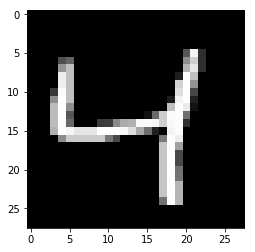

In [11]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

## Network Architecture



In [12]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

 Instead of flattening the images though, pass them in as 28x28x1 arrays.

In [13]:
sess = tf.Session()

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

('Epoch: 1/20...', 'Training loss: 0.6926')
('Epoch: 1/20...', 'Training loss: 0.6888')
('Epoch: 1/20...', 'Training loss: 0.6845')
('Epoch: 1/20...', 'Training loss: 0.6797')
('Epoch: 1/20...', 'Training loss: 0.6738')
('Epoch: 1/20...', 'Training loss: 0.6665')
('Epoch: 1/20...', 'Training loss: 0.6575')
('Epoch: 1/20...', 'Training loss: 0.6459')
('Epoch: 1/20...', 'Training loss: 0.6325')
('Epoch: 1/20...', 'Training loss: 0.6164')
('Epoch: 1/20...', 'Training loss: 0.5972')
('Epoch: 1/20...', 'Training loss: 0.5782')
('Epoch: 1/20...', 'Training loss: 0.5538')
('Epoch: 1/20...', 'Training loss: 0.5322')
('Epoch: 1/20...', 'Training loss: 0.5200')
('Epoch: 1/20...', 'Training loss: 0.5105')
('Epoch: 1/20...', 'Training loss: 0.5125')
('Epoch: 1/20...', 'Training loss: 0.5291')
('Epoch: 1/20...', 'Training loss: 0.5176')
('Epoch: 1/20...', 'Training loss: 0.5265')
('Epoch: 1/20...', 'Training loss: 0.5135')
('Epoch: 1/20...', 'Training loss: 0.5007')
('Epoch: 1/20...', 'Training los

('Epoch: 1/20...', 'Training loss: 0.1648')
('Epoch: 1/20...', 'Training loss: 0.1717')
('Epoch: 1/20...', 'Training loss: 0.1727')
('Epoch: 1/20...', 'Training loss: 0.1687')
('Epoch: 1/20...', 'Training loss: 0.1661')
('Epoch: 1/20...', 'Training loss: 0.1683')
('Epoch: 1/20...', 'Training loss: 0.1661')
('Epoch: 1/20...', 'Training loss: 0.1662')
('Epoch: 1/20...', 'Training loss: 0.1645')
('Epoch: 1/20...', 'Training loss: 0.1660')
('Epoch: 1/20...', 'Training loss: 0.1705')
('Epoch: 1/20...', 'Training loss: 0.1614')
('Epoch: 1/20...', 'Training loss: 0.1703')
('Epoch: 1/20...', 'Training loss: 0.1642')
('Epoch: 1/20...', 'Training loss: 0.1714')
('Epoch: 1/20...', 'Training loss: 0.1707')
('Epoch: 1/20...', 'Training loss: 0.1738')
('Epoch: 1/20...', 'Training loss: 0.1698')
('Epoch: 1/20...', 'Training loss: 0.1680')
('Epoch: 1/20...', 'Training loss: 0.1653')
('Epoch: 1/20...', 'Training loss: 0.1721')
('Epoch: 1/20...', 'Training loss: 0.1672')
('Epoch: 1/20...', 'Training los

('Epoch: 2/20...', 'Training loss: 0.1412')
('Epoch: 2/20...', 'Training loss: 0.1465')
('Epoch: 2/20...', 'Training loss: 0.1409')
('Epoch: 2/20...', 'Training loss: 0.1423')
('Epoch: 2/20...', 'Training loss: 0.1426')
('Epoch: 2/20...', 'Training loss: 0.1411')
('Epoch: 2/20...', 'Training loss: 0.1403')
('Epoch: 2/20...', 'Training loss: 0.1452')
('Epoch: 2/20...', 'Training loss: 0.1407')
('Epoch: 2/20...', 'Training loss: 0.1368')
('Epoch: 2/20...', 'Training loss: 0.1404')
('Epoch: 2/20...', 'Training loss: 0.1425')
('Epoch: 2/20...', 'Training loss: 0.1430')
('Epoch: 2/20...', 'Training loss: 0.1482')
('Epoch: 2/20...', 'Training loss: 0.1465')
('Epoch: 2/20...', 'Training loss: 0.1421')
('Epoch: 2/20...', 'Training loss: 0.1441')
('Epoch: 2/20...', 'Training loss: 0.1454')
('Epoch: 2/20...', 'Training loss: 0.1429')
('Epoch: 2/20...', 'Training loss: 0.1408')
('Epoch: 2/20...', 'Training loss: 0.1401')
('Epoch: 2/20...', 'Training loss: 0.1354')
('Epoch: 2/20...', 'Training los

('Epoch: 2/20...', 'Training loss: 0.1325')
('Epoch: 2/20...', 'Training loss: 0.1308')
('Epoch: 2/20...', 'Training loss: 0.1306')
('Epoch: 2/20...', 'Training loss: 0.1336')
('Epoch: 2/20...', 'Training loss: 0.1374')
('Epoch: 2/20...', 'Training loss: 0.1301')
('Epoch: 2/20...', 'Training loss: 0.1298')
('Epoch: 2/20...', 'Training loss: 0.1343')
('Epoch: 2/20...', 'Training loss: 0.1343')
('Epoch: 2/20...', 'Training loss: 0.1300')
('Epoch: 2/20...', 'Training loss: 0.1317')
('Epoch: 2/20...', 'Training loss: 0.1378')
('Epoch: 2/20...', 'Training loss: 0.1307')
('Epoch: 2/20...', 'Training loss: 0.1244')
('Epoch: 2/20...', 'Training loss: 0.1358')
('Epoch: 2/20...', 'Training loss: 0.1303')
('Epoch: 2/20...', 'Training loss: 0.1345')
('Epoch: 2/20...', 'Training loss: 0.1334')
('Epoch: 2/20...', 'Training loss: 0.1322')
('Epoch: 2/20...', 'Training loss: 0.1286')
('Epoch: 3/20...', 'Training loss: 0.1267')
('Epoch: 3/20...', 'Training loss: 0.1337')
('Epoch: 3/20...', 'Training los

('Epoch: 3/20...', 'Training loss: 0.1247')
('Epoch: 3/20...', 'Training loss: 0.1276')
('Epoch: 3/20...', 'Training loss: 0.1238')
('Epoch: 3/20...', 'Training loss: 0.1270')
('Epoch: 3/20...', 'Training loss: 0.1310')
('Epoch: 3/20...', 'Training loss: 0.1284')
('Epoch: 3/20...', 'Training loss: 0.1255')
('Epoch: 3/20...', 'Training loss: 0.1237')
('Epoch: 3/20...', 'Training loss: 0.1308')
('Epoch: 3/20...', 'Training loss: 0.1204')
('Epoch: 3/20...', 'Training loss: 0.1241')
('Epoch: 3/20...', 'Training loss: 0.1287')
('Epoch: 3/20...', 'Training loss: 0.1250')
('Epoch: 3/20...', 'Training loss: 0.1235')
('Epoch: 3/20...', 'Training loss: 0.1241')
('Epoch: 3/20...', 'Training loss: 0.1245')
('Epoch: 3/20...', 'Training loss: 0.1264')
('Epoch: 3/20...', 'Training loss: 0.1286')
('Epoch: 3/20...', 'Training loss: 0.1270')
('Epoch: 3/20...', 'Training loss: 0.1257')
('Epoch: 3/20...', 'Training loss: 0.1226')
('Epoch: 3/20...', 'Training loss: 0.1217')
('Epoch: 3/20...', 'Training los

('Epoch: 4/20...', 'Training loss: 0.1197')
('Epoch: 4/20...', 'Training loss: 0.1252')
('Epoch: 4/20...', 'Training loss: 0.1211')
('Epoch: 4/20...', 'Training loss: 0.1207')
('Epoch: 4/20...', 'Training loss: 0.1202')
('Epoch: 4/20...', 'Training loss: 0.1238')
('Epoch: 4/20...', 'Training loss: 0.1199')
('Epoch: 4/20...', 'Training loss: 0.1247')
('Epoch: 4/20...', 'Training loss: 0.1233')
('Epoch: 4/20...', 'Training loss: 0.1225')
('Epoch: 4/20...', 'Training loss: 0.1278')
('Epoch: 4/20...', 'Training loss: 0.1206')
('Epoch: 4/20...', 'Training loss: 0.1199')
('Epoch: 4/20...', 'Training loss: 0.1249')
('Epoch: 4/20...', 'Training loss: 0.1183')
('Epoch: 4/20...', 'Training loss: 0.1217')
('Epoch: 4/20...', 'Training loss: 0.1162')
('Epoch: 4/20...', 'Training loss: 0.1171')
('Epoch: 4/20...', 'Training loss: 0.1210')
('Epoch: 4/20...', 'Training loss: 0.1270')
('Epoch: 4/20...', 'Training loss: 0.1255')
('Epoch: 4/20...', 'Training loss: 0.1228')
('Epoch: 4/20...', 'Training los

('Epoch: 4/20...', 'Training loss: 0.1152')
('Epoch: 4/20...', 'Training loss: 0.1159')
('Epoch: 4/20...', 'Training loss: 0.1232')
('Epoch: 4/20...', 'Training loss: 0.1159')
('Epoch: 4/20...', 'Training loss: 0.1150')
('Epoch: 4/20...', 'Training loss: 0.1204')
('Epoch: 4/20...', 'Training loss: 0.1191')
('Epoch: 4/20...', 'Training loss: 0.1167')
('Epoch: 4/20...', 'Training loss: 0.1195')
('Epoch: 4/20...', 'Training loss: 0.1199')
('Epoch: 4/20...', 'Training loss: 0.1174')
('Epoch: 4/20...', 'Training loss: 0.1148')
('Epoch: 4/20...', 'Training loss: 0.1178')
('Epoch: 4/20...', 'Training loss: 0.1271')
('Epoch: 4/20...', 'Training loss: 0.1170')
('Epoch: 4/20...', 'Training loss: 0.1185')
('Epoch: 4/20...', 'Training loss: 0.1173')
('Epoch: 4/20...', 'Training loss: 0.1193')
('Epoch: 4/20...', 'Training loss: 0.1201')
('Epoch: 4/20...', 'Training loss: 0.1249')
('Epoch: 4/20...', 'Training loss: 0.1217')
('Epoch: 4/20...', 'Training loss: 0.1252')
('Epoch: 4/20...', 'Training los

('Epoch: 5/20...', 'Training loss: 0.1171')
('Epoch: 5/20...', 'Training loss: 0.1167')
('Epoch: 5/20...', 'Training loss: 0.1136')
('Epoch: 5/20...', 'Training loss: 0.1094')
('Epoch: 5/20...', 'Training loss: 0.1181')
('Epoch: 5/20...', 'Training loss: 0.1124')
('Epoch: 5/20...', 'Training loss: 0.1147')
('Epoch: 5/20...', 'Training loss: 0.1164')
('Epoch: 5/20...', 'Training loss: 0.1181')
('Epoch: 5/20...', 'Training loss: 0.1126')
('Epoch: 5/20...', 'Training loss: 0.1215')
('Epoch: 5/20...', 'Training loss: 0.1173')
('Epoch: 5/20...', 'Training loss: 0.1148')
('Epoch: 5/20...', 'Training loss: 0.1197')
('Epoch: 5/20...', 'Training loss: 0.1110')
('Epoch: 5/20...', 'Training loss: 0.1155')
('Epoch: 5/20...', 'Training loss: 0.1154')
('Epoch: 5/20...', 'Training loss: 0.1147')
('Epoch: 5/20...', 'Training loss: 0.1135')
('Epoch: 5/20...', 'Training loss: 0.1150')
('Epoch: 5/20...', 'Training loss: 0.1128')
('Epoch: 5/20...', 'Training loss: 0.1168')
('Epoch: 5/20...', 'Training los

('Epoch: 6/20...', 'Training loss: 0.1152')
('Epoch: 6/20...', 'Training loss: 0.1129')
('Epoch: 6/20...', 'Training loss: 0.1119')
('Epoch: 6/20...', 'Training loss: 0.1140')
('Epoch: 6/20...', 'Training loss: 0.1125')
('Epoch: 6/20...', 'Training loss: 0.1170')
('Epoch: 6/20...', 'Training loss: 0.1152')
('Epoch: 6/20...', 'Training loss: 0.1146')
('Epoch: 6/20...', 'Training loss: 0.1092')
('Epoch: 6/20...', 'Training loss: 0.1173')
('Epoch: 6/20...', 'Training loss: 0.1147')
('Epoch: 6/20...', 'Training loss: 0.1151')
('Epoch: 6/20...', 'Training loss: 0.1156')
('Epoch: 6/20...', 'Training loss: 0.1122')
('Epoch: 6/20...', 'Training loss: 0.1161')
('Epoch: 6/20...', 'Training loss: 0.1138')
('Epoch: 6/20...', 'Training loss: 0.1191')
('Epoch: 6/20...', 'Training loss: 0.1111')
('Epoch: 6/20...', 'Training loss: 0.1131')
('Epoch: 6/20...', 'Training loss: 0.1129')
('Epoch: 6/20...', 'Training loss: 0.1157')
('Epoch: 6/20...', 'Training loss: 0.1153')
('Epoch: 6/20...', 'Training los

('Epoch: 6/20...', 'Training loss: 0.1125')
('Epoch: 6/20...', 'Training loss: 0.1129')
('Epoch: 6/20...', 'Training loss: 0.1181')
('Epoch: 6/20...', 'Training loss: 0.1085')
('Epoch: 6/20...', 'Training loss: 0.1119')
('Epoch: 6/20...', 'Training loss: 0.1094')
('Epoch: 6/20...', 'Training loss: 0.1094')
('Epoch: 6/20...', 'Training loss: 0.1105')
('Epoch: 6/20...', 'Training loss: 0.1109')
('Epoch: 6/20...', 'Training loss: 0.1090')
('Epoch: 6/20...', 'Training loss: 0.1175')
('Epoch: 6/20...', 'Training loss: 0.1138')
('Epoch: 6/20...', 'Training loss: 0.1152')
('Epoch: 6/20...', 'Training loss: 0.1132')
('Epoch: 6/20...', 'Training loss: 0.1134')
('Epoch: 6/20...', 'Training loss: 0.1108')
('Epoch: 6/20...', 'Training loss: 0.1120')
('Epoch: 6/20...', 'Training loss: 0.1143')
('Epoch: 6/20...', 'Training loss: 0.1159')
('Epoch: 6/20...', 'Training loss: 0.1156')
('Epoch: 6/20...', 'Training loss: 0.1128')
('Epoch: 6/20...', 'Training loss: 0.1125')
('Epoch: 6/20...', 'Training los

('Epoch: 7/20...', 'Training loss: 0.1112')
('Epoch: 7/20...', 'Training loss: 0.1100')
('Epoch: 7/20...', 'Training loss: 0.1145')
('Epoch: 7/20...', 'Training loss: 0.1147')
('Epoch: 7/20...', 'Training loss: 0.1083')
('Epoch: 7/20...', 'Training loss: 0.1122')
('Epoch: 7/20...', 'Training loss: 0.1143')
('Epoch: 7/20...', 'Training loss: 0.1062')
('Epoch: 7/20...', 'Training loss: 0.1091')
('Epoch: 7/20...', 'Training loss: 0.1119')
('Epoch: 7/20...', 'Training loss: 0.1110')
('Epoch: 7/20...', 'Training loss: 0.1097')
('Epoch: 7/20...', 'Training loss: 0.1133')
('Epoch: 7/20...', 'Training loss: 0.1091')
('Epoch: 7/20...', 'Training loss: 0.1111')
('Epoch: 7/20...', 'Training loss: 0.1112')
('Epoch: 7/20...', 'Training loss: 0.1109')
('Epoch: 7/20...', 'Training loss: 0.1132')
('Epoch: 7/20...', 'Training loss: 0.1161')
('Epoch: 7/20...', 'Training loss: 0.1141')
('Epoch: 7/20...', 'Training loss: 0.1120')
('Epoch: 7/20...', 'Training loss: 0.1103')
('Epoch: 7/20...', 'Training los

('Epoch: 8/20...', 'Training loss: 0.1079')
('Epoch: 8/20...', 'Training loss: 0.1131')
('Epoch: 8/20...', 'Training loss: 0.1068')
('Epoch: 8/20...', 'Training loss: 0.1103')
('Epoch: 8/20...', 'Training loss: 0.1114')
('Epoch: 8/20...', 'Training loss: 0.1083')
('Epoch: 8/20...', 'Training loss: 0.1095')
('Epoch: 8/20...', 'Training loss: 0.1080')
('Epoch: 8/20...', 'Training loss: 0.1077')
('Epoch: 8/20...', 'Training loss: 0.1076')
('Epoch: 8/20...', 'Training loss: 0.1093')
('Epoch: 8/20...', 'Training loss: 0.1059')
('Epoch: 8/20...', 'Training loss: 0.1122')
('Epoch: 8/20...', 'Training loss: 0.1096')
('Epoch: 8/20...', 'Training loss: 0.1121')
('Epoch: 8/20...', 'Training loss: 0.1140')
('Epoch: 8/20...', 'Training loss: 0.1088')
('Epoch: 8/20...', 'Training loss: 0.1117')
('Epoch: 8/20...', 'Training loss: 0.1093')
('Epoch: 8/20...', 'Training loss: 0.1076')
('Epoch: 8/20...', 'Training loss: 0.1084')
('Epoch: 8/20...', 'Training loss: 0.1061')
('Epoch: 8/20...', 'Training los

('Epoch: 8/20...', 'Training loss: 0.1119')
('Epoch: 8/20...', 'Training loss: 0.1061')
('Epoch: 8/20...', 'Training loss: 0.1099')
('Epoch: 8/20...', 'Training loss: 0.1094')
('Epoch: 8/20...', 'Training loss: 0.1039')
('Epoch: 8/20...', 'Training loss: 0.1063')
('Epoch: 8/20...', 'Training loss: 0.1074')
('Epoch: 8/20...', 'Training loss: 0.1116')
('Epoch: 8/20...', 'Training loss: 0.1105')
('Epoch: 8/20...', 'Training loss: 0.1046')
('Epoch: 8/20...', 'Training loss: 0.1126')
('Epoch: 8/20...', 'Training loss: 0.1068')
('Epoch: 8/20...', 'Training loss: 0.1114')
('Epoch: 8/20...', 'Training loss: 0.1074')
('Epoch: 8/20...', 'Training loss: 0.1112')
('Epoch: 8/20...', 'Training loss: 0.1104')
('Epoch: 8/20...', 'Training loss: 0.1053')
('Epoch: 8/20...', 'Training loss: 0.1087')
('Epoch: 8/20...', 'Training loss: 0.1143')
('Epoch: 8/20...', 'Training loss: 0.1102')
('Epoch: 8/20...', 'Training loss: 0.1049')
('Epoch: 8/20...', 'Training loss: 0.1081')
('Epoch: 8/20...', 'Training los

('Epoch: 9/20...', 'Training loss: 0.1132')
('Epoch: 9/20...', 'Training loss: 0.1087')
('Epoch: 9/20...', 'Training loss: 0.1104')
('Epoch: 9/20...', 'Training loss: 0.1035')
('Epoch: 9/20...', 'Training loss: 0.1126')
('Epoch: 9/20...', 'Training loss: 0.1056')
('Epoch: 9/20...', 'Training loss: 0.1073')
('Epoch: 9/20...', 'Training loss: 0.1044')
('Epoch: 9/20...', 'Training loss: 0.1068')
('Epoch: 9/20...', 'Training loss: 0.1053')
('Epoch: 9/20...', 'Training loss: 0.1090')
('Epoch: 9/20...', 'Training loss: 0.1108')
('Epoch: 9/20...', 'Training loss: 0.1062')
('Epoch: 9/20...', 'Training loss: 0.1060')
('Epoch: 9/20...', 'Training loss: 0.1052')
('Epoch: 9/20...', 'Training loss: 0.1061')
('Epoch: 9/20...', 'Training loss: 0.1099')
('Epoch: 9/20...', 'Training loss: 0.1098')
('Epoch: 9/20...', 'Training loss: 0.1069')
('Epoch: 9/20...', 'Training loss: 0.1031')
('Epoch: 9/20...', 'Training loss: 0.1088')
('Epoch: 9/20...', 'Training loss: 0.1044')
('Epoch: 9/20...', 'Training los

('Epoch: 9/20...', 'Training loss: 0.1104')
('Epoch: 9/20...', 'Training loss: 0.1047')
('Epoch: 9/20...', 'Training loss: 0.1041')
('Epoch: 9/20...', 'Training loss: 0.1083')
('Epoch: 9/20...', 'Training loss: 0.1069')
('Epoch: 9/20...', 'Training loss: 0.1055')
('Epoch: 9/20...', 'Training loss: 0.1068')
('Epoch: 9/20...', 'Training loss: 0.1111')
('Epoch: 9/20...', 'Training loss: 0.1097')
('Epoch: 9/20...', 'Training loss: 0.1066')
('Epoch: 9/20...', 'Training loss: 0.1050')
('Epoch: 9/20...', 'Training loss: 0.1103')
('Epoch: 9/20...', 'Training loss: 0.1100')
('Epoch: 9/20...', 'Training loss: 0.1061')
('Epoch: 9/20...', 'Training loss: 0.1091')
('Epoch: 9/20...', 'Training loss: 0.1062')
('Epoch: 9/20...', 'Training loss: 0.1102')
('Epoch: 9/20...', 'Training loss: 0.1081')
('Epoch: 9/20...', 'Training loss: 0.1107')
('Epoch: 9/20...', 'Training loss: 0.1078')
('Epoch: 9/20...', 'Training loss: 0.1091')
('Epoch: 9/20...', 'Training loss: 0.1093')
('Epoch: 9/20...', 'Training los

('Epoch: 10/20...', 'Training loss: 0.1067')
('Epoch: 10/20...', 'Training loss: 0.1067')
('Epoch: 10/20...', 'Training loss: 0.1082')
('Epoch: 10/20...', 'Training loss: 0.1044')
('Epoch: 10/20...', 'Training loss: 0.1038')
('Epoch: 10/20...', 'Training loss: 0.1071')
('Epoch: 10/20...', 'Training loss: 0.1065')
('Epoch: 10/20...', 'Training loss: 0.1032')
('Epoch: 10/20...', 'Training loss: 0.1044')
('Epoch: 10/20...', 'Training loss: 0.1025')
('Epoch: 10/20...', 'Training loss: 0.1055')
('Epoch: 10/20...', 'Training loss: 0.1067')
('Epoch: 10/20...', 'Training loss: 0.1077')
('Epoch: 10/20...', 'Training loss: 0.1065')
('Epoch: 10/20...', 'Training loss: 0.1053')
('Epoch: 10/20...', 'Training loss: 0.1087')
('Epoch: 10/20...', 'Training loss: 0.1033')
('Epoch: 10/20...', 'Training loss: 0.1007')
('Epoch: 10/20...', 'Training loss: 0.1056')
('Epoch: 10/20...', 'Training loss: 0.1058')
('Epoch: 10/20...', 'Training loss: 0.1036')
('Epoch: 10/20...', 'Training loss: 0.1071')
('Epoch: 1

('Epoch: 11/20...', 'Training loss: 0.1057')
('Epoch: 11/20...', 'Training loss: 0.1028')
('Epoch: 11/20...', 'Training loss: 0.1048')
('Epoch: 11/20...', 'Training loss: 0.1088')
('Epoch: 11/20...', 'Training loss: 0.1042')
('Epoch: 11/20...', 'Training loss: 0.1036')
('Epoch: 11/20...', 'Training loss: 0.1034')
('Epoch: 11/20...', 'Training loss: 0.1038')
('Epoch: 11/20...', 'Training loss: 0.1064')
('Epoch: 11/20...', 'Training loss: 0.1031')
('Epoch: 11/20...', 'Training loss: 0.1088')
('Epoch: 11/20...', 'Training loss: 0.1063')
('Epoch: 11/20...', 'Training loss: 0.1058')
('Epoch: 11/20...', 'Training loss: 0.1056')
('Epoch: 11/20...', 'Training loss: 0.1055')
('Epoch: 11/20...', 'Training loss: 0.1068')
('Epoch: 11/20...', 'Training loss: 0.1087')
('Epoch: 11/20...', 'Training loss: 0.1058')
('Epoch: 11/20...', 'Training loss: 0.1069')
('Epoch: 11/20...', 'Training loss: 0.1064')
('Epoch: 11/20...', 'Training loss: 0.1091')
('Epoch: 11/20...', 'Training loss: 0.1058')
('Epoch: 1

('Epoch: 11/20...', 'Training loss: 0.1022')
('Epoch: 11/20...', 'Training loss: 0.1068')
('Epoch: 11/20...', 'Training loss: 0.1047')
('Epoch: 11/20...', 'Training loss: 0.1037')
('Epoch: 11/20...', 'Training loss: 0.1041')
('Epoch: 11/20...', 'Training loss: 0.1045')
('Epoch: 11/20...', 'Training loss: 0.1019')
('Epoch: 11/20...', 'Training loss: 0.1043')
('Epoch: 11/20...', 'Training loss: 0.1051')
('Epoch: 11/20...', 'Training loss: 0.1065')
('Epoch: 11/20...', 'Training loss: 0.1076')
('Epoch: 11/20...', 'Training loss: 0.1022')
('Epoch: 11/20...', 'Training loss: 0.1033')
('Epoch: 11/20...', 'Training loss: 0.1025')
('Epoch: 11/20...', 'Training loss: 0.1068')
('Epoch: 11/20...', 'Training loss: 0.1060')
('Epoch: 11/20...', 'Training loss: 0.1070')
('Epoch: 11/20...', 'Training loss: 0.1047')
('Epoch: 11/20...', 'Training loss: 0.1090')
('Epoch: 11/20...', 'Training loss: 0.1000')
('Epoch: 11/20...', 'Training loss: 0.1041')
('Epoch: 11/20...', 'Training loss: 0.1052')
('Epoch: 1

('Epoch: 12/20...', 'Training loss: 0.1046')
('Epoch: 12/20...', 'Training loss: 0.0985')
('Epoch: 12/20...', 'Training loss: 0.1031')
('Epoch: 12/20...', 'Training loss: 0.1016')
('Epoch: 12/20...', 'Training loss: 0.1061')
('Epoch: 12/20...', 'Training loss: 0.1029')
('Epoch: 12/20...', 'Training loss: 0.1022')
('Epoch: 12/20...', 'Training loss: 0.1051')
('Epoch: 12/20...', 'Training loss: 0.1022')
('Epoch: 12/20...', 'Training loss: 0.1025')
('Epoch: 12/20...', 'Training loss: 0.1050')
('Epoch: 12/20...', 'Training loss: 0.1036')
('Epoch: 12/20...', 'Training loss: 0.1037')
('Epoch: 12/20...', 'Training loss: 0.1042')
('Epoch: 12/20...', 'Training loss: 0.1031')
('Epoch: 12/20...', 'Training loss: 0.1044')
('Epoch: 12/20...', 'Training loss: 0.1008')
('Epoch: 12/20...', 'Training loss: 0.1045')
('Epoch: 12/20...', 'Training loss: 0.1041')
('Epoch: 12/20...', 'Training loss: 0.1018')
('Epoch: 12/20...', 'Training loss: 0.1018')
('Epoch: 12/20...', 'Training loss: 0.1019')
('Epoch: 1

('Epoch: 13/20...', 'Training loss: 0.1018')
('Epoch: 13/20...', 'Training loss: 0.1049')
('Epoch: 13/20...', 'Training loss: 0.1015')
('Epoch: 13/20...', 'Training loss: 0.0999')
('Epoch: 13/20...', 'Training loss: 0.1038')
('Epoch: 13/20...', 'Training loss: 0.1040')
('Epoch: 13/20...', 'Training loss: 0.1016')
('Epoch: 13/20...', 'Training loss: 0.1015')
('Epoch: 13/20...', 'Training loss: 0.1065')
('Epoch: 13/20...', 'Training loss: 0.1046')
('Epoch: 13/20...', 'Training loss: 0.1046')
('Epoch: 13/20...', 'Training loss: 0.1039')
('Epoch: 13/20...', 'Training loss: 0.1050')
('Epoch: 13/20...', 'Training loss: 0.1035')
('Epoch: 13/20...', 'Training loss: 0.1048')
('Epoch: 13/20...', 'Training loss: 0.1011')
('Epoch: 13/20...', 'Training loss: 0.1037')
('Epoch: 13/20...', 'Training loss: 0.1020')
('Epoch: 13/20...', 'Training loss: 0.1041')
('Epoch: 13/20...', 'Training loss: 0.1070')
('Epoch: 13/20...', 'Training loss: 0.1060')
('Epoch: 13/20...', 'Training loss: 0.1041')
('Epoch: 1

('Epoch: 13/20...', 'Training loss: 0.1048')
('Epoch: 13/20...', 'Training loss: 0.1047')
('Epoch: 13/20...', 'Training loss: 0.1008')
('Epoch: 13/20...', 'Training loss: 0.1017')
('Epoch: 13/20...', 'Training loss: 0.1003')
('Epoch: 13/20...', 'Training loss: 0.1057')
('Epoch: 13/20...', 'Training loss: 0.1033')
('Epoch: 13/20...', 'Training loss: 0.1039')
('Epoch: 13/20...', 'Training loss: 0.1041')
('Epoch: 13/20...', 'Training loss: 0.1035')
('Epoch: 13/20...', 'Training loss: 0.1050')
('Epoch: 13/20...', 'Training loss: 0.1027')
('Epoch: 13/20...', 'Training loss: 0.1014')
('Epoch: 13/20...', 'Training loss: 0.1078')
('Epoch: 13/20...', 'Training loss: 0.1025')
('Epoch: 13/20...', 'Training loss: 0.1011')
('Epoch: 13/20...', 'Training loss: 0.1031')
('Epoch: 13/20...', 'Training loss: 0.0989')
('Epoch: 13/20...', 'Training loss: 0.1037')
('Epoch: 13/20...', 'Training loss: 0.1077')
('Epoch: 13/20...', 'Training loss: 0.1042')
('Epoch: 13/20...', 'Training loss: 0.1023')
('Epoch: 1

('Epoch: 14/20...', 'Training loss: 0.0980')
('Epoch: 14/20...', 'Training loss: 0.0979')
('Epoch: 14/20...', 'Training loss: 0.1066')
('Epoch: 14/20...', 'Training loss: 0.1055')
('Epoch: 14/20...', 'Training loss: 0.1028')
('Epoch: 14/20...', 'Training loss: 0.1068')
('Epoch: 14/20...', 'Training loss: 0.1038')
('Epoch: 14/20...', 'Training loss: 0.1031')
('Epoch: 14/20...', 'Training loss: 0.0986')
('Epoch: 14/20...', 'Training loss: 0.1055')
('Epoch: 14/20...', 'Training loss: 0.1076')
('Epoch: 14/20...', 'Training loss: 0.0975')
('Epoch: 14/20...', 'Training loss: 0.1094')
('Epoch: 14/20...', 'Training loss: 0.1034')
('Epoch: 14/20...', 'Training loss: 0.1039')
('Epoch: 14/20...', 'Training loss: 0.1014')
('Epoch: 14/20...', 'Training loss: 0.1015')
('Epoch: 14/20...', 'Training loss: 0.1070')
('Epoch: 14/20...', 'Training loss: 0.1017')
('Epoch: 14/20...', 'Training loss: 0.1032')
('Epoch: 14/20...', 'Training loss: 0.0994')
('Epoch: 14/20...', 'Training loss: 0.1017')
('Epoch: 1

('Epoch: 14/20...', 'Training loss: 0.0991')
('Epoch: 14/20...', 'Training loss: 0.1026')
('Epoch: 14/20...', 'Training loss: 0.1049')
('Epoch: 14/20...', 'Training loss: 0.1023')
('Epoch: 14/20...', 'Training loss: 0.1013')
('Epoch: 14/20...', 'Training loss: 0.0999')
('Epoch: 14/20...', 'Training loss: 0.1013')
('Epoch: 14/20...', 'Training loss: 0.0994')
('Epoch: 14/20...', 'Training loss: 0.0987')
('Epoch: 14/20...', 'Training loss: 0.0968')
('Epoch: 15/20...', 'Training loss: 0.1031')
('Epoch: 15/20...', 'Training loss: 0.0978')
('Epoch: 15/20...', 'Training loss: 0.0998')
('Epoch: 15/20...', 'Training loss: 0.1048')
('Epoch: 15/20...', 'Training loss: 0.1022')
('Epoch: 15/20...', 'Training loss: 0.1050')
('Epoch: 15/20...', 'Training loss: 0.1053')
('Epoch: 15/20...', 'Training loss: 0.1028')
('Epoch: 15/20...', 'Training loss: 0.1005')
('Epoch: 15/20...', 'Training loss: 0.1002')
('Epoch: 15/20...', 'Training loss: 0.1004')
('Epoch: 15/20...', 'Training loss: 0.1016')
('Epoch: 1

('Epoch: 15/20...', 'Training loss: 0.1040')
('Epoch: 15/20...', 'Training loss: 0.1089')
('Epoch: 15/20...', 'Training loss: 0.1053')
('Epoch: 15/20...', 'Training loss: 0.1027')
('Epoch: 15/20...', 'Training loss: 0.1004')
('Epoch: 15/20...', 'Training loss: 0.0981')
('Epoch: 15/20...', 'Training loss: 0.1022')
('Epoch: 15/20...', 'Training loss: 0.1044')
('Epoch: 15/20...', 'Training loss: 0.0983')
('Epoch: 15/20...', 'Training loss: 0.1006')
('Epoch: 15/20...', 'Training loss: 0.1001')
('Epoch: 15/20...', 'Training loss: 0.1056')
('Epoch: 15/20...', 'Training loss: 0.1015')
('Epoch: 15/20...', 'Training loss: 0.0994')
('Epoch: 15/20...', 'Training loss: 0.0964')
('Epoch: 15/20...', 'Training loss: 0.1047')
('Epoch: 15/20...', 'Training loss: 0.1047')
('Epoch: 15/20...', 'Training loss: 0.1021')
('Epoch: 15/20...', 'Training loss: 0.1017')
('Epoch: 15/20...', 'Training loss: 0.1000')
('Epoch: 15/20...', 'Training loss: 0.1031')
('Epoch: 15/20...', 'Training loss: 0.1021')
('Epoch: 1

('Epoch: 16/20...', 'Training loss: 0.1031')
('Epoch: 16/20...', 'Training loss: 0.1058')
('Epoch: 16/20...', 'Training loss: 0.1005')
('Epoch: 16/20...', 'Training loss: 0.1038')
('Epoch: 16/20...', 'Training loss: 0.1008')
('Epoch: 16/20...', 'Training loss: 0.1015')
('Epoch: 16/20...', 'Training loss: 0.1025')
('Epoch: 16/20...', 'Training loss: 0.0997')
('Epoch: 16/20...', 'Training loss: 0.1013')
('Epoch: 16/20...', 'Training loss: 0.1013')
('Epoch: 16/20...', 'Training loss: 0.1012')
('Epoch: 16/20...', 'Training loss: 0.1012')
('Epoch: 16/20...', 'Training loss: 0.1034')
('Epoch: 16/20...', 'Training loss: 0.1074')
('Epoch: 16/20...', 'Training loss: 0.1007')
('Epoch: 16/20...', 'Training loss: 0.1001')
('Epoch: 16/20...', 'Training loss: 0.1025')
('Epoch: 16/20...', 'Training loss: 0.1012')
('Epoch: 16/20...', 'Training loss: 0.1022')
('Epoch: 16/20...', 'Training loss: 0.1015')
('Epoch: 16/20...', 'Training loss: 0.1002')
('Epoch: 16/20...', 'Training loss: 0.1012')
('Epoch: 1

('Epoch: 16/20...', 'Training loss: 0.1048')
('Epoch: 16/20...', 'Training loss: 0.1018')
('Epoch: 16/20...', 'Training loss: 0.1019')
('Epoch: 16/20...', 'Training loss: 0.0975')
('Epoch: 16/20...', 'Training loss: 0.0990')
('Epoch: 16/20...', 'Training loss: 0.0985')
('Epoch: 16/20...', 'Training loss: 0.1038')
('Epoch: 16/20...', 'Training loss: 0.1015')
('Epoch: 16/20...', 'Training loss: 0.1040')
('Epoch: 16/20...', 'Training loss: 0.1013')
('Epoch: 16/20...', 'Training loss: 0.1022')
('Epoch: 16/20...', 'Training loss: 0.1011')
('Epoch: 16/20...', 'Training loss: 0.0956')
('Epoch: 16/20...', 'Training loss: 0.0990')
('Epoch: 16/20...', 'Training loss: 0.1011')
('Epoch: 16/20...', 'Training loss: 0.0980')
('Epoch: 16/20...', 'Training loss: 0.0988')
('Epoch: 16/20...', 'Training loss: 0.1040')
('Epoch: 16/20...', 'Training loss: 0.1041')
('Epoch: 16/20...', 'Training loss: 0.1002')
('Epoch: 16/20...', 'Training loss: 0.1037')
('Epoch: 16/20...', 'Training loss: 0.1024')
('Epoch: 1

('Epoch: 17/20...', 'Training loss: 0.1018')
('Epoch: 17/20...', 'Training loss: 0.1052')
('Epoch: 17/20...', 'Training loss: 0.1020')
('Epoch: 17/20...', 'Training loss: 0.1004')
('Epoch: 17/20...', 'Training loss: 0.0992')
('Epoch: 17/20...', 'Training loss: 0.1012')
('Epoch: 17/20...', 'Training loss: 0.0986')
('Epoch: 17/20...', 'Training loss: 0.0965')
('Epoch: 17/20...', 'Training loss: 0.0989')
('Epoch: 17/20...', 'Training loss: 0.0979')
('Epoch: 17/20...', 'Training loss: 0.1030')
('Epoch: 17/20...', 'Training loss: 0.1027')
('Epoch: 17/20...', 'Training loss: 0.1024')
('Epoch: 17/20...', 'Training loss: 0.0994')
('Epoch: 17/20...', 'Training loss: 0.1018')
('Epoch: 17/20...', 'Training loss: 0.0999')
('Epoch: 17/20...', 'Training loss: 0.0980')
('Epoch: 17/20...', 'Training loss: 0.1026')
('Epoch: 17/20...', 'Training loss: 0.0994')
('Epoch: 17/20...', 'Training loss: 0.1018')
('Epoch: 17/20...', 'Training loss: 0.1029')
('Epoch: 17/20...', 'Training loss: 0.1040')
('Epoch: 1

('Epoch: 18/20...', 'Training loss: 0.1012')
('Epoch: 18/20...', 'Training loss: 0.1014')
('Epoch: 18/20...', 'Training loss: 0.1024')
('Epoch: 18/20...', 'Training loss: 0.0971')
('Epoch: 18/20...', 'Training loss: 0.0997')
('Epoch: 18/20...', 'Training loss: 0.0988')
('Epoch: 18/20...', 'Training loss: 0.0998')
('Epoch: 18/20...', 'Training loss: 0.1009')
('Epoch: 18/20...', 'Training loss: 0.0987')
('Epoch: 18/20...', 'Training loss: 0.0997')
('Epoch: 18/20...', 'Training loss: 0.1019')
('Epoch: 18/20...', 'Training loss: 0.0965')
('Epoch: 18/20...', 'Training loss: 0.1012')
('Epoch: 18/20...', 'Training loss: 0.1015')
('Epoch: 18/20...', 'Training loss: 0.0978')
('Epoch: 18/20...', 'Training loss: 0.1019')
('Epoch: 18/20...', 'Training loss: 0.1031')
('Epoch: 18/20...', 'Training loss: 0.0991')
('Epoch: 18/20...', 'Training loss: 0.0970')
('Epoch: 18/20...', 'Training loss: 0.0975')
('Epoch: 18/20...', 'Training loss: 0.1008')
('Epoch: 18/20...', 'Training loss: 0.0980')
('Epoch: 1

('Epoch: 18/20...', 'Training loss: 0.0994')
('Epoch: 18/20...', 'Training loss: 0.0990')
('Epoch: 18/20...', 'Training loss: 0.1010')
('Epoch: 18/20...', 'Training loss: 0.1021')
('Epoch: 18/20...', 'Training loss: 0.0984')
('Epoch: 18/20...', 'Training loss: 0.0997')
('Epoch: 18/20...', 'Training loss: 0.0990')
('Epoch: 18/20...', 'Training loss: 0.0993')
('Epoch: 18/20...', 'Training loss: 0.1021')
('Epoch: 18/20...', 'Training loss: 0.1010')
('Epoch: 18/20...', 'Training loss: 0.0983')
('Epoch: 18/20...', 'Training loss: 0.0994')
('Epoch: 18/20...', 'Training loss: 0.0995')
('Epoch: 18/20...', 'Training loss: 0.1013')
('Epoch: 18/20...', 'Training loss: 0.1038')
('Epoch: 18/20...', 'Training loss: 0.0991')
('Epoch: 18/20...', 'Training loss: 0.0993')
('Epoch: 18/20...', 'Training loss: 0.1016')
('Epoch: 18/20...', 'Training loss: 0.1013')
('Epoch: 18/20...', 'Training loss: 0.1006')
('Epoch: 18/20...', 'Training loss: 0.1034')
('Epoch: 18/20...', 'Training loss: 0.0990')
('Epoch: 1

('Epoch: 19/20...', 'Training loss: 0.1001')
('Epoch: 19/20...', 'Training loss: 0.0970')
('Epoch: 19/20...', 'Training loss: 0.0981')
('Epoch: 19/20...', 'Training loss: 0.1060')
('Epoch: 19/20...', 'Training loss: 0.0979')
('Epoch: 19/20...', 'Training loss: 0.0960')
('Epoch: 19/20...', 'Training loss: 0.1023')
('Epoch: 19/20...', 'Training loss: 0.1012')
('Epoch: 19/20...', 'Training loss: 0.0996')
('Epoch: 19/20...', 'Training loss: 0.0994')
('Epoch: 19/20...', 'Training loss: 0.0985')
('Epoch: 19/20...', 'Training loss: 0.1016')
('Epoch: 19/20...', 'Training loss: 0.0978')
('Epoch: 19/20...', 'Training loss: 0.1018')
('Epoch: 19/20...', 'Training loss: 0.0959')
('Epoch: 19/20...', 'Training loss: 0.0990')
('Epoch: 19/20...', 'Training loss: 0.0973')
('Epoch: 19/20...', 'Training loss: 0.1000')
('Epoch: 19/20...', 'Training loss: 0.0986')
('Epoch: 19/20...', 'Training loss: 0.0979')
('Epoch: 19/20...', 'Training loss: 0.0998')
('Epoch: 19/20...', 'Training loss: 0.1015')
('Epoch: 1

('Epoch: 20/20...', 'Training loss: 0.1003')
('Epoch: 20/20...', 'Training loss: 0.1008')
('Epoch: 20/20...', 'Training loss: 0.0980')
('Epoch: 20/20...', 'Training loss: 0.0988')
('Epoch: 20/20...', 'Training loss: 0.0975')
('Epoch: 20/20...', 'Training loss: 0.0998')
('Epoch: 20/20...', 'Training loss: 0.0979')
('Epoch: 20/20...', 'Training loss: 0.0984')
('Epoch: 20/20...', 'Training loss: 0.0969')
('Epoch: 20/20...', 'Training loss: 0.1016')
('Epoch: 20/20...', 'Training loss: 0.0982')
('Epoch: 20/20...', 'Training loss: 0.1014')
('Epoch: 20/20...', 'Training loss: 0.0974')
('Epoch: 20/20...', 'Training loss: 0.0997')
('Epoch: 20/20...', 'Training loss: 0.0992')
('Epoch: 20/20...', 'Training loss: 0.1003')
('Epoch: 20/20...', 'Training loss: 0.0989')
('Epoch: 20/20...', 'Training loss: 0.0985')
('Epoch: 20/20...', 'Training loss: 0.0989')
('Epoch: 20/20...', 'Training loss: 0.0996')
('Epoch: 20/20...', 'Training loss: 0.1053')
('Epoch: 20/20...', 'Training loss: 0.1000')
('Epoch: 2

('Epoch: 20/20...', 'Training loss: 0.1030')
('Epoch: 20/20...', 'Training loss: 0.0987')
('Epoch: 20/20...', 'Training loss: 0.1003')
('Epoch: 20/20...', 'Training loss: 0.0993')
('Epoch: 20/20...', 'Training loss: 0.0993')
('Epoch: 20/20...', 'Training loss: 0.0993')
('Epoch: 20/20...', 'Training loss: 0.0968')
('Epoch: 20/20...', 'Training loss: 0.0997')
('Epoch: 20/20...', 'Training loss: 0.0948')
('Epoch: 20/20...', 'Training loss: 0.1003')
('Epoch: 20/20...', 'Training loss: 0.0983')
('Epoch: 20/20...', 'Training loss: 0.0973')
('Epoch: 20/20...', 'Training loss: 0.0978')
('Epoch: 20/20...', 'Training loss: 0.0973')
('Epoch: 20/20...', 'Training loss: 0.1011')
('Epoch: 20/20...', 'Training loss: 0.0958')
('Epoch: 20/20...', 'Training loss: 0.1028')
('Epoch: 20/20...', 'Training loss: 0.0975')
('Epoch: 20/20...', 'Training loss: 0.1026')
('Epoch: 20/20...', 'Training loss: 0.0985')
('Epoch: 20/20...', 'Training loss: 0.1041')
('Epoch: 20/20...', 'Training loss: 0.0994')
('Epoch: 2

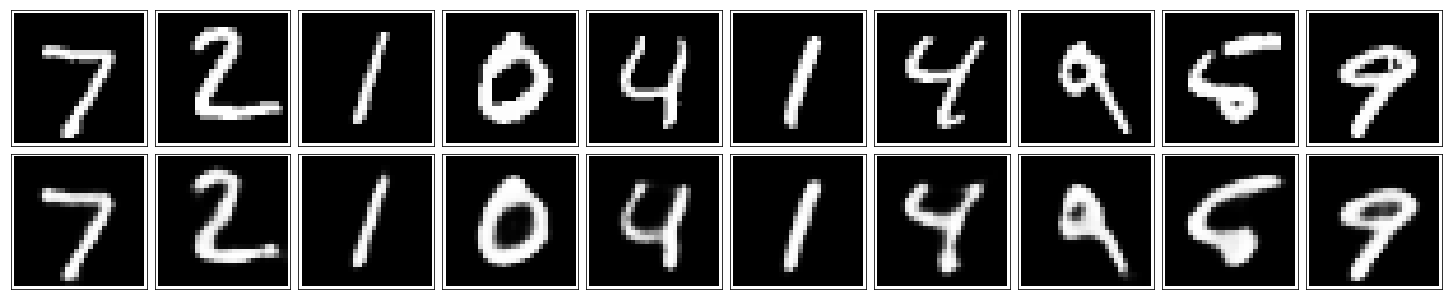

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [18]:
sess.close()

## Denoising
* Autoencoders can be used to denoise images quite successfully just by training the network on noisy images. 

* Use noisy images as input and the original, clean images as targets. 


* Use deeper convolutional layers here, more feature maps, like 32-32-16 for the depths of the convolutional layers in the encoder, and the same depths going backward through the decoder. 

In [19]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x32
conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x32
conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x16

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x16
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x16
conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x32
conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [20]:
sess = tf.Session()

In [21]:
epochs = 50
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

('Epoch: 1/50...', 'Training loss: 0.6869')
('Epoch: 1/50...', 'Training loss: 0.6683')
('Epoch: 1/50...', 'Training loss: 0.6423')
('Epoch: 1/50...', 'Training loss: 0.6067')
('Epoch: 1/50...', 'Training loss: 0.5480')
('Epoch: 1/50...', 'Training loss: 0.5016')
('Epoch: 1/50...', 'Training loss: 0.4907')
('Epoch: 1/50...', 'Training loss: 0.5404')
('Epoch: 1/50...', 'Training loss: 0.5137')
('Epoch: 1/50...', 'Training loss: 0.4938')
('Epoch: 1/50...', 'Training loss: 0.4786')
('Epoch: 1/50...', 'Training loss: 0.4705')
('Epoch: 1/50...', 'Training loss: 0.4756')
('Epoch: 1/50...', 'Training loss: 0.4680')
('Epoch: 1/50...', 'Training loss: 0.4550')
('Epoch: 1/50...', 'Training loss: 0.4566')
('Epoch: 1/50...', 'Training loss: 0.4428')
('Epoch: 1/50...', 'Training loss: 0.4287')
('Epoch: 1/50...', 'Training loss: 0.4372')
('Epoch: 1/50...', 'Training loss: 0.4189')
('Epoch: 1/50...', 'Training loss: 0.4183')
('Epoch: 1/50...', 'Training loss: 0.4074')
('Epoch: 1/50...', 'Training los

('Epoch: 1/50...', 'Training loss: 0.1792')
('Epoch: 1/50...', 'Training loss: 0.1781')
('Epoch: 1/50...', 'Training loss: 0.1793')
('Epoch: 1/50...', 'Training loss: 0.1825')
('Epoch: 1/50...', 'Training loss: 0.1809')
('Epoch: 1/50...', 'Training loss: 0.1786')
('Epoch: 1/50...', 'Training loss: 0.1775')
('Epoch: 1/50...', 'Training loss: 0.1853')
('Epoch: 1/50...', 'Training loss: 0.1765')
('Epoch: 1/50...', 'Training loss: 0.1791')
('Epoch: 1/50...', 'Training loss: 0.1806')
('Epoch: 1/50...', 'Training loss: 0.1847')
('Epoch: 1/50...', 'Training loss: 0.1768')
('Epoch: 1/50...', 'Training loss: 0.1720')
('Epoch: 1/50...', 'Training loss: 0.1747')
('Epoch: 1/50...', 'Training loss: 0.1799')
('Epoch: 1/50...', 'Training loss: 0.1743')
('Epoch: 1/50...', 'Training loss: 0.1770')
('Epoch: 1/50...', 'Training loss: 0.1736')
('Epoch: 1/50...', 'Training loss: 0.1753')
('Epoch: 1/50...', 'Training loss: 0.1769')
('Epoch: 1/50...', 'Training loss: 0.1722')
('Epoch: 1/50...', 'Training los

('Epoch: 2/50...', 'Training loss: 0.1568')
('Epoch: 2/50...', 'Training loss: 0.1522')
('Epoch: 2/50...', 'Training loss: 0.1547')
('Epoch: 2/50...', 'Training loss: 0.1478')
('Epoch: 2/50...', 'Training loss: 0.1549')
('Epoch: 2/50...', 'Training loss: 0.1505')
('Epoch: 2/50...', 'Training loss: 0.1585')
('Epoch: 2/50...', 'Training loss: 0.1550')
('Epoch: 2/50...', 'Training loss: 0.1545')
('Epoch: 2/50...', 'Training loss: 0.1549')
('Epoch: 2/50...', 'Training loss: 0.1516')
('Epoch: 2/50...', 'Training loss: 0.1543')
('Epoch: 2/50...', 'Training loss: 0.1580')
('Epoch: 2/50...', 'Training loss: 0.1566')
('Epoch: 2/50...', 'Training loss: 0.1533')
('Epoch: 2/50...', 'Training loss: 0.1540')
('Epoch: 2/50...', 'Training loss: 0.1521')
('Epoch: 2/50...', 'Training loss: 0.1528')
('Epoch: 2/50...', 'Training loss: 0.1491')
('Epoch: 2/50...', 'Training loss: 0.1544')
('Epoch: 2/50...', 'Training loss: 0.1547')
('Epoch: 2/50...', 'Training loss: 0.1532')
('Epoch: 2/50...', 'Training los

('Epoch: 2/50...', 'Training loss: 0.1455')
('Epoch: 2/50...', 'Training loss: 0.1449')
('Epoch: 2/50...', 'Training loss: 0.1368')
('Epoch: 2/50...', 'Training loss: 0.1381')
('Epoch: 2/50...', 'Training loss: 0.1410')
('Epoch: 2/50...', 'Training loss: 0.1398')
('Epoch: 2/50...', 'Training loss: 0.1440')
('Epoch: 2/50...', 'Training loss: 0.1439')
('Epoch: 2/50...', 'Training loss: 0.1380')
('Epoch: 2/50...', 'Training loss: 0.1429')
('Epoch: 2/50...', 'Training loss: 0.1442')
('Epoch: 2/50...', 'Training loss: 0.1408')
('Epoch: 2/50...', 'Training loss: 0.1480')
('Epoch: 2/50...', 'Training loss: 0.1367')
('Epoch: 2/50...', 'Training loss: 0.1437')
('Epoch: 2/50...', 'Training loss: 0.1512')
('Epoch: 2/50...', 'Training loss: 0.1416')
('Epoch: 2/50...', 'Training loss: 0.1384')
('Epoch: 2/50...', 'Training loss: 0.1401')
('Epoch: 2/50...', 'Training loss: 0.1440')
('Epoch: 2/50...', 'Training loss: 0.1416')
('Epoch: 2/50...', 'Training loss: 0.1422')
('Epoch: 2/50...', 'Training los

('Epoch: 3/50...', 'Training loss: 0.1335')
('Epoch: 3/50...', 'Training loss: 0.1351')
('Epoch: 3/50...', 'Training loss: 0.1429')
('Epoch: 3/50...', 'Training loss: 0.1283')
('Epoch: 3/50...', 'Training loss: 0.1354')
('Epoch: 3/50...', 'Training loss: 0.1330')
('Epoch: 3/50...', 'Training loss: 0.1283')
('Epoch: 3/50...', 'Training loss: 0.1347')
('Epoch: 3/50...', 'Training loss: 0.1350')
('Epoch: 3/50...', 'Training loss: 0.1319')
('Epoch: 3/50...', 'Training loss: 0.1347')
('Epoch: 3/50...', 'Training loss: 0.1296')
('Epoch: 3/50...', 'Training loss: 0.1361')
('Epoch: 3/50...', 'Training loss: 0.1337')
('Epoch: 3/50...', 'Training loss: 0.1345')
('Epoch: 3/50...', 'Training loss: 0.1327')
('Epoch: 3/50...', 'Training loss: 0.1312')
('Epoch: 3/50...', 'Training loss: 0.1333')
('Epoch: 3/50...', 'Training loss: 0.1346')
('Epoch: 3/50...', 'Training loss: 0.1351')
('Epoch: 3/50...', 'Training loss: 0.1309')
('Epoch: 3/50...', 'Training loss: 0.1330')
('Epoch: 3/50...', 'Training los

('Epoch: 4/50...', 'Training loss: 0.1279')
('Epoch: 4/50...', 'Training loss: 0.1309')
('Epoch: 4/50...', 'Training loss: 0.1299')
('Epoch: 4/50...', 'Training loss: 0.1283')
('Epoch: 4/50...', 'Training loss: 0.1262')
('Epoch: 4/50...', 'Training loss: 0.1330')
('Epoch: 4/50...', 'Training loss: 0.1320')
('Epoch: 4/50...', 'Training loss: 0.1306')
('Epoch: 4/50...', 'Training loss: 0.1317')
('Epoch: 4/50...', 'Training loss: 0.1303')
('Epoch: 4/50...', 'Training loss: 0.1237')
('Epoch: 4/50...', 'Training loss: 0.1288')
('Epoch: 4/50...', 'Training loss: 0.1337')
('Epoch: 4/50...', 'Training loss: 0.1284')
('Epoch: 4/50...', 'Training loss: 0.1288')
('Epoch: 4/50...', 'Training loss: 0.1334')
('Epoch: 4/50...', 'Training loss: 0.1272')
('Epoch: 4/50...', 'Training loss: 0.1360')
('Epoch: 4/50...', 'Training loss: 0.1311')
('Epoch: 4/50...', 'Training loss: 0.1337')
('Epoch: 4/50...', 'Training loss: 0.1292')
('Epoch: 4/50...', 'Training loss: 0.1283')
('Epoch: 4/50...', 'Training los

('Epoch: 4/50...', 'Training loss: 0.1246')
('Epoch: 4/50...', 'Training loss: 0.1285')
('Epoch: 4/50...', 'Training loss: 0.1309')
('Epoch: 4/50...', 'Training loss: 0.1277')
('Epoch: 4/50...', 'Training loss: 0.1262')
('Epoch: 4/50...', 'Training loss: 0.1194')
('Epoch: 4/50...', 'Training loss: 0.1272')
('Epoch: 4/50...', 'Training loss: 0.1230')
('Epoch: 4/50...', 'Training loss: 0.1267')
('Epoch: 4/50...', 'Training loss: 0.1281')
('Epoch: 4/50...', 'Training loss: 0.1301')
('Epoch: 4/50...', 'Training loss: 0.1271')
('Epoch: 4/50...', 'Training loss: 0.1274')
('Epoch: 4/50...', 'Training loss: 0.1269')
('Epoch: 4/50...', 'Training loss: 0.1293')
('Epoch: 4/50...', 'Training loss: 0.1250')
('Epoch: 4/50...', 'Training loss: 0.1255')
('Epoch: 4/50...', 'Training loss: 0.1223')
('Epoch: 4/50...', 'Training loss: 0.1296')
('Epoch: 4/50...', 'Training loss: 0.1249')
('Epoch: 4/50...', 'Training loss: 0.1225')
('Epoch: 4/50...', 'Training loss: 0.1258')
('Epoch: 4/50...', 'Training los

('Epoch: 5/50...', 'Training loss: 0.1277')
('Epoch: 5/50...', 'Training loss: 0.1216')
('Epoch: 5/50...', 'Training loss: 0.1257')
('Epoch: 5/50...', 'Training loss: 0.1224')
('Epoch: 5/50...', 'Training loss: 0.1246')
('Epoch: 5/50...', 'Training loss: 0.1207')
('Epoch: 5/50...', 'Training loss: 0.1239')
('Epoch: 5/50...', 'Training loss: 0.1248')
('Epoch: 5/50...', 'Training loss: 0.1243')
('Epoch: 5/50...', 'Training loss: 0.1250')
('Epoch: 5/50...', 'Training loss: 0.1259')
('Epoch: 5/50...', 'Training loss: 0.1200')
('Epoch: 5/50...', 'Training loss: 0.1268')
('Epoch: 5/50...', 'Training loss: 0.1229')
('Epoch: 5/50...', 'Training loss: 0.1274')
('Epoch: 5/50...', 'Training loss: 0.1212')
('Epoch: 5/50...', 'Training loss: 0.1216')
('Epoch: 5/50...', 'Training loss: 0.1262')
('Epoch: 5/50...', 'Training loss: 0.1249')
('Epoch: 5/50...', 'Training loss: 0.1208')
('Epoch: 5/50...', 'Training loss: 0.1252')
('Epoch: 5/50...', 'Training loss: 0.1214')
('Epoch: 5/50...', 'Training los

('Epoch: 6/50...', 'Training loss: 0.1189')
('Epoch: 6/50...', 'Training loss: 0.1216')
('Epoch: 6/50...', 'Training loss: 0.1250')
('Epoch: 6/50...', 'Training loss: 0.1186')
('Epoch: 6/50...', 'Training loss: 0.1265')
('Epoch: 6/50...', 'Training loss: 0.1202')
('Epoch: 6/50...', 'Training loss: 0.1227')
('Epoch: 6/50...', 'Training loss: 0.1223')
('Epoch: 6/50...', 'Training loss: 0.1241')
('Epoch: 6/50...', 'Training loss: 0.1218')
('Epoch: 6/50...', 'Training loss: 0.1188')
('Epoch: 6/50...', 'Training loss: 0.1253')
('Epoch: 6/50...', 'Training loss: 0.1202')
('Epoch: 6/50...', 'Training loss: 0.1189')
('Epoch: 6/50...', 'Training loss: 0.1252')
('Epoch: 6/50...', 'Training loss: 0.1211')
('Epoch: 6/50...', 'Training loss: 0.1222')
('Epoch: 6/50...', 'Training loss: 0.1203')
('Epoch: 6/50...', 'Training loss: 0.1246')
('Epoch: 6/50...', 'Training loss: 0.1212')
('Epoch: 6/50...', 'Training loss: 0.1197')
('Epoch: 6/50...', 'Training loss: 0.1226')
('Epoch: 6/50...', 'Training los

('Epoch: 6/50...', 'Training loss: 0.1227')
('Epoch: 6/50...', 'Training loss: 0.1235')
('Epoch: 6/50...', 'Training loss: 0.1178')
('Epoch: 6/50...', 'Training loss: 0.1186')
('Epoch: 6/50...', 'Training loss: 0.1199')
('Epoch: 6/50...', 'Training loss: 0.1201')
('Epoch: 6/50...', 'Training loss: 0.1223')
('Epoch: 6/50...', 'Training loss: 0.1240')
('Epoch: 6/50...', 'Training loss: 0.1163')
('Epoch: 6/50...', 'Training loss: 0.1155')
('Epoch: 6/50...', 'Training loss: 0.1166')
('Epoch: 6/50...', 'Training loss: 0.1214')
('Epoch: 6/50...', 'Training loss: 0.1203')
('Epoch: 6/50...', 'Training loss: 0.1170')
('Epoch: 6/50...', 'Training loss: 0.1196')
('Epoch: 6/50...', 'Training loss: 0.1183')
('Epoch: 6/50...', 'Training loss: 0.1208')
('Epoch: 6/50...', 'Training loss: 0.1194')
('Epoch: 6/50...', 'Training loss: 0.1191')
('Epoch: 6/50...', 'Training loss: 0.1176')
('Epoch: 6/50...', 'Training loss: 0.1200')
('Epoch: 6/50...', 'Training loss: 0.1147')
('Epoch: 6/50...', 'Training los

('Epoch: 7/50...', 'Training loss: 0.1153')
('Epoch: 7/50...', 'Training loss: 0.1188')
('Epoch: 7/50...', 'Training loss: 0.1123')
('Epoch: 7/50...', 'Training loss: 0.1223')
('Epoch: 7/50...', 'Training loss: 0.1170')
('Epoch: 7/50...', 'Training loss: 0.1195')
('Epoch: 7/50...', 'Training loss: 0.1177')
('Epoch: 7/50...', 'Training loss: 0.1166')
('Epoch: 7/50...', 'Training loss: 0.1198')
('Epoch: 7/50...', 'Training loss: 0.1169')
('Epoch: 7/50...', 'Training loss: 0.1136')
('Epoch: 7/50...', 'Training loss: 0.1211')
('Epoch: 7/50...', 'Training loss: 0.1178')
('Epoch: 7/50...', 'Training loss: 0.1209')
('Epoch: 7/50...', 'Training loss: 0.1203')
('Epoch: 7/50...', 'Training loss: 0.1167')
('Epoch: 7/50...', 'Training loss: 0.1176')
('Epoch: 7/50...', 'Training loss: 0.1215')
('Epoch: 7/50...', 'Training loss: 0.1136')
('Epoch: 7/50...', 'Training loss: 0.1161')
('Epoch: 7/50...', 'Training loss: 0.1205')
('Epoch: 7/50...', 'Training loss: 0.1145')
('Epoch: 7/50...', 'Training los

('Epoch: 7/50...', 'Training loss: 0.1184')
('Epoch: 7/50...', 'Training loss: 0.1151')
('Epoch: 7/50...', 'Training loss: 0.1135')
('Epoch: 7/50...', 'Training loss: 0.1152')
('Epoch: 7/50...', 'Training loss: 0.1141')
('Epoch: 7/50...', 'Training loss: 0.1110')
('Epoch: 7/50...', 'Training loss: 0.1213')
('Epoch: 7/50...', 'Training loss: 0.1138')
('Epoch: 7/50...', 'Training loss: 0.1161')
('Epoch: 7/50...', 'Training loss: 0.1163')
('Epoch: 7/50...', 'Training loss: 0.1163')
('Epoch: 7/50...', 'Training loss: 0.1181')
('Epoch: 7/50...', 'Training loss: 0.1175')
('Epoch: 7/50...', 'Training loss: 0.1168')
('Epoch: 7/50...', 'Training loss: 0.1162')
('Epoch: 7/50...', 'Training loss: 0.1160')
('Epoch: 7/50...', 'Training loss: 0.1181')
('Epoch: 7/50...', 'Training loss: 0.1148')
('Epoch: 7/50...', 'Training loss: 0.1192')
('Epoch: 7/50...', 'Training loss: 0.1164')
('Epoch: 7/50...', 'Training loss: 0.1144')
('Epoch: 7/50...', 'Training loss: 0.1178')
('Epoch: 7/50...', 'Training los

('Epoch: 8/50...', 'Training loss: 0.1133')
('Epoch: 8/50...', 'Training loss: 0.1138')
('Epoch: 8/50...', 'Training loss: 0.1142')
('Epoch: 8/50...', 'Training loss: 0.1151')
('Epoch: 8/50...', 'Training loss: 0.1147')
('Epoch: 8/50...', 'Training loss: 0.1144')
('Epoch: 8/50...', 'Training loss: 0.1169')
('Epoch: 8/50...', 'Training loss: 0.1154')
('Epoch: 8/50...', 'Training loss: 0.1166')
('Epoch: 8/50...', 'Training loss: 0.1141')
('Epoch: 8/50...', 'Training loss: 0.1150')
('Epoch: 8/50...', 'Training loss: 0.1168')
('Epoch: 8/50...', 'Training loss: 0.1150')
('Epoch: 8/50...', 'Training loss: 0.1178')
('Epoch: 8/50...', 'Training loss: 0.1162')
('Epoch: 8/50...', 'Training loss: 0.1152')
('Epoch: 8/50...', 'Training loss: 0.1166')
('Epoch: 8/50...', 'Training loss: 0.1190')
('Epoch: 8/50...', 'Training loss: 0.1164')
('Epoch: 8/50...', 'Training loss: 0.1100')
('Epoch: 8/50...', 'Training loss: 0.1147')
('Epoch: 8/50...', 'Training loss: 0.1137')
('Epoch: 8/50...', 'Training los

('Epoch: 9/50...', 'Training loss: 0.1109')
('Epoch: 9/50...', 'Training loss: 0.1106')
('Epoch: 9/50...', 'Training loss: 0.1126')
('Epoch: 9/50...', 'Training loss: 0.1154')
('Epoch: 9/50...', 'Training loss: 0.1147')
('Epoch: 9/50...', 'Training loss: 0.1100')
('Epoch: 9/50...', 'Training loss: 0.1105')
('Epoch: 9/50...', 'Training loss: 0.1128')
('Epoch: 9/50...', 'Training loss: 0.1189')
('Epoch: 9/50...', 'Training loss: 0.1169')
('Epoch: 9/50...', 'Training loss: 0.1176')
('Epoch: 9/50...', 'Training loss: 0.1143')
('Epoch: 9/50...', 'Training loss: 0.1192')
('Epoch: 9/50...', 'Training loss: 0.1104')
('Epoch: 9/50...', 'Training loss: 0.1149')
('Epoch: 9/50...', 'Training loss: 0.1140')
('Epoch: 9/50...', 'Training loss: 0.1149')
('Epoch: 9/50...', 'Training loss: 0.1135')
('Epoch: 9/50...', 'Training loss: 0.1142')
('Epoch: 9/50...', 'Training loss: 0.1108')
('Epoch: 9/50...', 'Training loss: 0.1123')
('Epoch: 9/50...', 'Training loss: 0.1181')
('Epoch: 9/50...', 'Training los

('Epoch: 9/50...', 'Training loss: 0.1119')
('Epoch: 9/50...', 'Training loss: 0.1151')
('Epoch: 9/50...', 'Training loss: 0.1101')
('Epoch: 9/50...', 'Training loss: 0.1141')
('Epoch: 9/50...', 'Training loss: 0.1130')
('Epoch: 9/50...', 'Training loss: 0.1113')
('Epoch: 9/50...', 'Training loss: 0.1176')
('Epoch: 9/50...', 'Training loss: 0.1149')
('Epoch: 9/50...', 'Training loss: 0.1143')
('Epoch: 9/50...', 'Training loss: 0.1102')
('Epoch: 9/50...', 'Training loss: 0.1137')
('Epoch: 9/50...', 'Training loss: 0.1159')
('Epoch: 9/50...', 'Training loss: 0.1100')
('Epoch: 9/50...', 'Training loss: 0.1176')
('Epoch: 9/50...', 'Training loss: 0.1128')
('Epoch: 9/50...', 'Training loss: 0.1149')
('Epoch: 9/50...', 'Training loss: 0.1125')
('Epoch: 9/50...', 'Training loss: 0.1133')
('Epoch: 9/50...', 'Training loss: 0.1141')
('Epoch: 9/50...', 'Training loss: 0.1101')
('Epoch: 9/50...', 'Training loss: 0.1091')
('Epoch: 9/50...', 'Training loss: 0.1152')
('Epoch: 9/50...', 'Training los

('Epoch: 10/50...', 'Training loss: 0.1145')
('Epoch: 10/50...', 'Training loss: 0.1140')
('Epoch: 10/50...', 'Training loss: 0.1121')
('Epoch: 10/50...', 'Training loss: 0.1173')
('Epoch: 10/50...', 'Training loss: 0.1091')
('Epoch: 10/50...', 'Training loss: 0.1182')
('Epoch: 10/50...', 'Training loss: 0.1123')
('Epoch: 10/50...', 'Training loss: 0.1127')
('Epoch: 10/50...', 'Training loss: 0.1121')
('Epoch: 10/50...', 'Training loss: 0.1121')
('Epoch: 10/50...', 'Training loss: 0.1141')
('Epoch: 10/50...', 'Training loss: 0.1148')
('Epoch: 10/50...', 'Training loss: 0.1140')
('Epoch: 10/50...', 'Training loss: 0.1114')
('Epoch: 10/50...', 'Training loss: 0.1138')
('Epoch: 10/50...', 'Training loss: 0.1150')
('Epoch: 10/50...', 'Training loss: 0.1127')
('Epoch: 10/50...', 'Training loss: 0.1133')
('Epoch: 10/50...', 'Training loss: 0.1108')
('Epoch: 10/50...', 'Training loss: 0.1089')
('Epoch: 10/50...', 'Training loss: 0.1102')
('Epoch: 10/50...', 'Training loss: 0.1128')
('Epoch: 1

('Epoch: 11/50...', 'Training loss: 0.1175')
('Epoch: 11/50...', 'Training loss: 0.1146')
('Epoch: 11/50...', 'Training loss: 0.1089')
('Epoch: 11/50...', 'Training loss: 0.1111')
('Epoch: 11/50...', 'Training loss: 0.1140')
('Epoch: 11/50...', 'Training loss: 0.1118')
('Epoch: 11/50...', 'Training loss: 0.1131')
('Epoch: 11/50...', 'Training loss: 0.1146')
('Epoch: 11/50...', 'Training loss: 0.1118')
('Epoch: 11/50...', 'Training loss: 0.1072')
('Epoch: 11/50...', 'Training loss: 0.1125')
('Epoch: 11/50...', 'Training loss: 0.1122')
('Epoch: 11/50...', 'Training loss: 0.1128')
('Epoch: 11/50...', 'Training loss: 0.1163')
('Epoch: 11/50...', 'Training loss: 0.1127')
('Epoch: 11/50...', 'Training loss: 0.1080')
('Epoch: 11/50...', 'Training loss: 0.1157')
('Epoch: 11/50...', 'Training loss: 0.1116')
('Epoch: 11/50...', 'Training loss: 0.1118')
('Epoch: 11/50...', 'Training loss: 0.1120')
('Epoch: 11/50...', 'Training loss: 0.1112')
('Epoch: 11/50...', 'Training loss: 0.1124')
('Epoch: 1

('Epoch: 11/50...', 'Training loss: 0.1060')
('Epoch: 11/50...', 'Training loss: 0.1108')
('Epoch: 11/50...', 'Training loss: 0.1118')
('Epoch: 11/50...', 'Training loss: 0.1080')
('Epoch: 11/50...', 'Training loss: 0.1113')
('Epoch: 11/50...', 'Training loss: 0.1104')
('Epoch: 11/50...', 'Training loss: 0.1080')
('Epoch: 11/50...', 'Training loss: 0.1164')
('Epoch: 11/50...', 'Training loss: 0.1149')
('Epoch: 11/50...', 'Training loss: 0.1090')
('Epoch: 11/50...', 'Training loss: 0.1077')
('Epoch: 11/50...', 'Training loss: 0.1086')
('Epoch: 11/50...', 'Training loss: 0.1088')
('Epoch: 11/50...', 'Training loss: 0.1114')
('Epoch: 11/50...', 'Training loss: 0.1123')
('Epoch: 11/50...', 'Training loss: 0.1092')
('Epoch: 11/50...', 'Training loss: 0.1101')
('Epoch: 11/50...', 'Training loss: 0.1109')
('Epoch: 11/50...', 'Training loss: 0.1121')
('Epoch: 11/50...', 'Training loss: 0.1103')
('Epoch: 11/50...', 'Training loss: 0.1096')
('Epoch: 11/50...', 'Training loss: 0.1090')
('Epoch: 1

('Epoch: 12/50...', 'Training loss: 0.1075')
('Epoch: 12/50...', 'Training loss: 0.1094')
('Epoch: 12/50...', 'Training loss: 0.1119')
('Epoch: 12/50...', 'Training loss: 0.1086')
('Epoch: 12/50...', 'Training loss: 0.1076')
('Epoch: 12/50...', 'Training loss: 0.1060')
('Epoch: 12/50...', 'Training loss: 0.1071')
('Epoch: 12/50...', 'Training loss: 0.1137')
('Epoch: 12/50...', 'Training loss: 0.1079')
('Epoch: 12/50...', 'Training loss: 0.1091')
('Epoch: 12/50...', 'Training loss: 0.1105')
('Epoch: 12/50...', 'Training loss: 0.1122')
('Epoch: 12/50...', 'Training loss: 0.1073')
('Epoch: 12/50...', 'Training loss: 0.1102')
('Epoch: 12/50...', 'Training loss: 0.1088')
('Epoch: 12/50...', 'Training loss: 0.1071')
('Epoch: 12/50...', 'Training loss: 0.1083')
('Epoch: 12/50...', 'Training loss: 0.1071')
('Epoch: 12/50...', 'Training loss: 0.1096')
('Epoch: 12/50...', 'Training loss: 0.1083')
('Epoch: 12/50...', 'Training loss: 0.1096')
('Epoch: 12/50...', 'Training loss: 0.1141')
('Epoch: 1

('Epoch: 12/50...', 'Training loss: 0.1101')
('Epoch: 12/50...', 'Training loss: 0.1048')
('Epoch: 12/50...', 'Training loss: 0.1069')
('Epoch: 12/50...', 'Training loss: 0.1096')
('Epoch: 12/50...', 'Training loss: 0.1097')
('Epoch: 12/50...', 'Training loss: 0.1101')
('Epoch: 12/50...', 'Training loss: 0.1101')
('Epoch: 12/50...', 'Training loss: 0.1110')
('Epoch: 12/50...', 'Training loss: 0.1104')
('Epoch: 12/50...', 'Training loss: 0.1154')
('Epoch: 12/50...', 'Training loss: 0.1045')
('Epoch: 12/50...', 'Training loss: 0.1076')
('Epoch: 12/50...', 'Training loss: 0.1117')
('Epoch: 12/50...', 'Training loss: 0.1116')
('Epoch: 12/50...', 'Training loss: 0.1061')
('Epoch: 12/50...', 'Training loss: 0.1137')
('Epoch: 12/50...', 'Training loss: 0.1083')
('Epoch: 12/50...', 'Training loss: 0.1094')
('Epoch: 12/50...', 'Training loss: 0.1090')
('Epoch: 12/50...', 'Training loss: 0.1083')
('Epoch: 12/50...', 'Training loss: 0.1075')
('Epoch: 12/50...', 'Training loss: 0.1099')
('Epoch: 1

('Epoch: 13/50...', 'Training loss: 0.1110')
('Epoch: 13/50...', 'Training loss: 0.1081')
('Epoch: 13/50...', 'Training loss: 0.1075')
('Epoch: 13/50...', 'Training loss: 0.1098')
('Epoch: 13/50...', 'Training loss: 0.1080')
('Epoch: 13/50...', 'Training loss: 0.1054')
('Epoch: 13/50...', 'Training loss: 0.1091')
('Epoch: 13/50...', 'Training loss: 0.1098')
('Epoch: 13/50...', 'Training loss: 0.1086')
('Epoch: 13/50...', 'Training loss: 0.1086')
('Epoch: 13/50...', 'Training loss: 0.1090')
('Epoch: 13/50...', 'Training loss: 0.1090')
('Epoch: 13/50...', 'Training loss: 0.1082')
('Epoch: 13/50...', 'Training loss: 0.1089')
('Epoch: 13/50...', 'Training loss: 0.1092')
('Epoch: 13/50...', 'Training loss: 0.1097')
('Epoch: 13/50...', 'Training loss: 0.1105')
('Epoch: 13/50...', 'Training loss: 0.1109')
('Epoch: 13/50...', 'Training loss: 0.1087')
('Epoch: 13/50...', 'Training loss: 0.1082')
('Epoch: 13/50...', 'Training loss: 0.1064')
('Epoch: 13/50...', 'Training loss: 0.1085')
('Epoch: 1

('Epoch: 14/50...', 'Training loss: 0.1077')
('Epoch: 14/50...', 'Training loss: 0.1077')
('Epoch: 14/50...', 'Training loss: 0.1090')
('Epoch: 14/50...', 'Training loss: 0.1096')
('Epoch: 14/50...', 'Training loss: 0.1058')
('Epoch: 14/50...', 'Training loss: 0.1083')
('Epoch: 14/50...', 'Training loss: 0.1070')
('Epoch: 14/50...', 'Training loss: 0.1094')
('Epoch: 14/50...', 'Training loss: 0.1087')
('Epoch: 14/50...', 'Training loss: 0.1091')
('Epoch: 14/50...', 'Training loss: 0.1088')
('Epoch: 14/50...', 'Training loss: 0.1106')
('Epoch: 14/50...', 'Training loss: 0.1113')
('Epoch: 14/50...', 'Training loss: 0.1089')
('Epoch: 14/50...', 'Training loss: 0.1087')
('Epoch: 14/50...', 'Training loss: 0.1111')
('Epoch: 14/50...', 'Training loss: 0.1098')
('Epoch: 14/50...', 'Training loss: 0.1077')
('Epoch: 14/50...', 'Training loss: 0.1076')
('Epoch: 14/50...', 'Training loss: 0.1121')
('Epoch: 14/50...', 'Training loss: 0.1093')
('Epoch: 14/50...', 'Training loss: 0.1068')
('Epoch: 1

('Epoch: 14/50...', 'Training loss: 0.1080')
('Epoch: 14/50...', 'Training loss: 0.1078')
('Epoch: 14/50...', 'Training loss: 0.1085')
('Epoch: 14/50...', 'Training loss: 0.1109')
('Epoch: 14/50...', 'Training loss: 0.1087')
('Epoch: 14/50...', 'Training loss: 0.1091')
('Epoch: 14/50...', 'Training loss: 0.1090')
('Epoch: 14/50...', 'Training loss: 0.1059')
('Epoch: 14/50...', 'Training loss: 0.1091')
('Epoch: 14/50...', 'Training loss: 0.1057')
('Epoch: 14/50...', 'Training loss: 0.1086')
('Epoch: 14/50...', 'Training loss: 0.1062')
('Epoch: 14/50...', 'Training loss: 0.1061')
('Epoch: 14/50...', 'Training loss: 0.1084')
('Epoch: 14/50...', 'Training loss: 0.1061')
('Epoch: 14/50...', 'Training loss: 0.1070')
('Epoch: 14/50...', 'Training loss: 0.1094')
('Epoch: 14/50...', 'Training loss: 0.1064')
('Epoch: 14/50...', 'Training loss: 0.1041')
('Epoch: 14/50...', 'Training loss: 0.1102')
('Epoch: 14/50...', 'Training loss: 0.1059')
('Epoch: 14/50...', 'Training loss: 0.1038')
('Epoch: 1

('Epoch: 15/50...', 'Training loss: 0.1055')
('Epoch: 15/50...', 'Training loss: 0.1065')
('Epoch: 15/50...', 'Training loss: 0.1079')
('Epoch: 15/50...', 'Training loss: 0.1083')
('Epoch: 15/50...', 'Training loss: 0.1101')
('Epoch: 15/50...', 'Training loss: 0.1041')
('Epoch: 15/50...', 'Training loss: 0.1078')
('Epoch: 15/50...', 'Training loss: 0.1105')
('Epoch: 15/50...', 'Training loss: 0.1076')
('Epoch: 15/50...', 'Training loss: 0.1051')
('Epoch: 15/50...', 'Training loss: 0.1098')
('Epoch: 15/50...', 'Training loss: 0.1067')
('Epoch: 15/50...', 'Training loss: 0.1053')
('Epoch: 15/50...', 'Training loss: 0.1095')
('Epoch: 15/50...', 'Training loss: 0.1072')
('Epoch: 15/50...', 'Training loss: 0.1073')
('Epoch: 15/50...', 'Training loss: 0.1098')
('Epoch: 15/50...', 'Training loss: 0.1072')
('Epoch: 15/50...', 'Training loss: 0.1059')
('Epoch: 15/50...', 'Training loss: 0.1088')
('Epoch: 15/50...', 'Training loss: 0.1111')
('Epoch: 15/50...', 'Training loss: 0.1099')
('Epoch: 1

('Epoch: 15/50...', 'Training loss: 0.1048')
('Epoch: 15/50...', 'Training loss: 0.1089')
('Epoch: 15/50...', 'Training loss: 0.1093')
('Epoch: 15/50...', 'Training loss: 0.1000')
('Epoch: 15/50...', 'Training loss: 0.1060')
('Epoch: 15/50...', 'Training loss: 0.1069')
('Epoch: 15/50...', 'Training loss: 0.1091')
('Epoch: 15/50...', 'Training loss: 0.1081')
('Epoch: 15/50...', 'Training loss: 0.1064')
('Epoch: 15/50...', 'Training loss: 0.1061')
('Epoch: 15/50...', 'Training loss: 0.1043')
('Epoch: 15/50...', 'Training loss: 0.1044')
('Epoch: 16/50...', 'Training loss: 0.1103')
('Epoch: 16/50...', 'Training loss: 0.1082')
('Epoch: 16/50...', 'Training loss: 0.1040')
('Epoch: 16/50...', 'Training loss: 0.1083')
('Epoch: 16/50...', 'Training loss: 0.1090')
('Epoch: 16/50...', 'Training loss: 0.1072')
('Epoch: 16/50...', 'Training loss: 0.1091')
('Epoch: 16/50...', 'Training loss: 0.1059')
('Epoch: 16/50...', 'Training loss: 0.1077')
('Epoch: 16/50...', 'Training loss: 0.1068')
('Epoch: 1

('Epoch: 16/50...', 'Training loss: 0.1060')
('Epoch: 16/50...', 'Training loss: 0.1035')
('Epoch: 16/50...', 'Training loss: 0.1033')
('Epoch: 16/50...', 'Training loss: 0.1072')
('Epoch: 16/50...', 'Training loss: 0.1071')
('Epoch: 16/50...', 'Training loss: 0.1061')
('Epoch: 16/50...', 'Training loss: 0.1055')
('Epoch: 16/50...', 'Training loss: 0.1076')
('Epoch: 16/50...', 'Training loss: 0.1063')
('Epoch: 16/50...', 'Training loss: 0.1100')
('Epoch: 16/50...', 'Training loss: 0.1082')
('Epoch: 16/50...', 'Training loss: 0.1057')
('Epoch: 16/50...', 'Training loss: 0.1073')
('Epoch: 16/50...', 'Training loss: 0.1076')
('Epoch: 16/50...', 'Training loss: 0.1037')
('Epoch: 16/50...', 'Training loss: 0.1053')
('Epoch: 16/50...', 'Training loss: 0.1063')
('Epoch: 16/50...', 'Training loss: 0.1069')
('Epoch: 16/50...', 'Training loss: 0.1051')
('Epoch: 16/50...', 'Training loss: 0.1053')
('Epoch: 16/50...', 'Training loss: 0.1083')
('Epoch: 16/50...', 'Training loss: 0.1063')
('Epoch: 1

('Epoch: 17/50...', 'Training loss: 0.1069')
('Epoch: 17/50...', 'Training loss: 0.1077')
('Epoch: 17/50...', 'Training loss: 0.1096')
('Epoch: 17/50...', 'Training loss: 0.1041')
('Epoch: 17/50...', 'Training loss: 0.1079')
('Epoch: 17/50...', 'Training loss: 0.1057')
('Epoch: 17/50...', 'Training loss: 0.1035')
('Epoch: 17/50...', 'Training loss: 0.1063')
('Epoch: 17/50...', 'Training loss: 0.1038')
('Epoch: 17/50...', 'Training loss: 0.1052')
('Epoch: 17/50...', 'Training loss: 0.1079')
('Epoch: 17/50...', 'Training loss: 0.1050')
('Epoch: 17/50...', 'Training loss: 0.1064')
('Epoch: 17/50...', 'Training loss: 0.1044')
('Epoch: 17/50...', 'Training loss: 0.1080')
('Epoch: 17/50...', 'Training loss: 0.1042')
('Epoch: 17/50...', 'Training loss: 0.1103')
('Epoch: 17/50...', 'Training loss: 0.1043')
('Epoch: 17/50...', 'Training loss: 0.1051')
('Epoch: 17/50...', 'Training loss: 0.1059')
('Epoch: 17/50...', 'Training loss: 0.1085')
('Epoch: 17/50...', 'Training loss: 0.1061')
('Epoch: 1

('Epoch: 17/50...', 'Training loss: 0.1039')
('Epoch: 17/50...', 'Training loss: 0.1047')
('Epoch: 17/50...', 'Training loss: 0.1077')
('Epoch: 17/50...', 'Training loss: 0.1060')
('Epoch: 17/50...', 'Training loss: 0.1067')
('Epoch: 17/50...', 'Training loss: 0.1076')
('Epoch: 17/50...', 'Training loss: 0.1045')
('Epoch: 17/50...', 'Training loss: 0.1038')
('Epoch: 17/50...', 'Training loss: 0.1062')
('Epoch: 17/50...', 'Training loss: 0.1067')
('Epoch: 17/50...', 'Training loss: 0.1093')
('Epoch: 17/50...', 'Training loss: 0.1065')
('Epoch: 17/50...', 'Training loss: 0.1120')
('Epoch: 17/50...', 'Training loss: 0.1043')
('Epoch: 17/50...', 'Training loss: 0.1060')
('Epoch: 17/50...', 'Training loss: 0.1050')
('Epoch: 17/50...', 'Training loss: 0.1079')
('Epoch: 17/50...', 'Training loss: 0.1057')
('Epoch: 17/50...', 'Training loss: 0.1057')
('Epoch: 17/50...', 'Training loss: 0.1054')
('Epoch: 17/50...', 'Training loss: 0.1057')
('Epoch: 17/50...', 'Training loss: 0.1074')
('Epoch: 1

('Epoch: 18/50...', 'Training loss: 0.1037')
('Epoch: 18/50...', 'Training loss: 0.1048')
('Epoch: 18/50...', 'Training loss: 0.1036')
('Epoch: 18/50...', 'Training loss: 0.1070')
('Epoch: 18/50...', 'Training loss: 0.1040')
('Epoch: 18/50...', 'Training loss: 0.1070')
('Epoch: 18/50...', 'Training loss: 0.1031')
('Epoch: 18/50...', 'Training loss: 0.1064')
('Epoch: 18/50...', 'Training loss: 0.1074')
('Epoch: 18/50...', 'Training loss: 0.1071')
('Epoch: 18/50...', 'Training loss: 0.1078')
('Epoch: 18/50...', 'Training loss: 0.1031')
('Epoch: 18/50...', 'Training loss: 0.1025')
('Epoch: 18/50...', 'Training loss: 0.1053')
('Epoch: 18/50...', 'Training loss: 0.1079')
('Epoch: 18/50...', 'Training loss: 0.1077')
('Epoch: 18/50...', 'Training loss: 0.1059')
('Epoch: 18/50...', 'Training loss: 0.1075')
('Epoch: 18/50...', 'Training loss: 0.1030')
('Epoch: 18/50...', 'Training loss: 0.1099')
('Epoch: 18/50...', 'Training loss: 0.1051')
('Epoch: 18/50...', 'Training loss: 0.1028')
('Epoch: 1

('Epoch: 19/50...', 'Training loss: 0.1093')
('Epoch: 19/50...', 'Training loss: 0.1053')
('Epoch: 19/50...', 'Training loss: 0.1024')
('Epoch: 19/50...', 'Training loss: 0.1056')
('Epoch: 19/50...', 'Training loss: 0.1059')
('Epoch: 19/50...', 'Training loss: 0.1060')
('Epoch: 19/50...', 'Training loss: 0.1056')
('Epoch: 19/50...', 'Training loss: 0.1037')
('Epoch: 19/50...', 'Training loss: 0.1043')
('Epoch: 19/50...', 'Training loss: 0.1075')
('Epoch: 19/50...', 'Training loss: 0.1013')
('Epoch: 19/50...', 'Training loss: 0.1090')
('Epoch: 19/50...', 'Training loss: 0.1031')
('Epoch: 19/50...', 'Training loss: 0.1004')
('Epoch: 19/50...', 'Training loss: 0.1089')
('Epoch: 19/50...', 'Training loss: 0.1045')
('Epoch: 19/50...', 'Training loss: 0.1089')
('Epoch: 19/50...', 'Training loss: 0.1059')
('Epoch: 19/50...', 'Training loss: 0.1047')
('Epoch: 19/50...', 'Training loss: 0.1072')
('Epoch: 19/50...', 'Training loss: 0.1059')
('Epoch: 19/50...', 'Training loss: 0.1075')
('Epoch: 1

('Epoch: 19/50...', 'Training loss: 0.1056')
('Epoch: 19/50...', 'Training loss: 0.1039')
('Epoch: 19/50...', 'Training loss: 0.1035')
('Epoch: 19/50...', 'Training loss: 0.1044')
('Epoch: 19/50...', 'Training loss: 0.1030')
('Epoch: 19/50...', 'Training loss: 0.1034')
('Epoch: 19/50...', 'Training loss: 0.1047')
('Epoch: 19/50...', 'Training loss: 0.1046')
('Epoch: 19/50...', 'Training loss: 0.1007')
('Epoch: 19/50...', 'Training loss: 0.1056')
('Epoch: 19/50...', 'Training loss: 0.1026')
('Epoch: 19/50...', 'Training loss: 0.1059')
('Epoch: 19/50...', 'Training loss: 0.1026')
('Epoch: 19/50...', 'Training loss: 0.1065')
('Epoch: 19/50...', 'Training loss: 0.1050')
('Epoch: 19/50...', 'Training loss: 0.1037')
('Epoch: 19/50...', 'Training loss: 0.1079')
('Epoch: 19/50...', 'Training loss: 0.1059')
('Epoch: 19/50...', 'Training loss: 0.1053')
('Epoch: 19/50...', 'Training loss: 0.1022')
('Epoch: 19/50...', 'Training loss: 0.1066')
('Epoch: 19/50...', 'Training loss: 0.1036')
('Epoch: 1

('Epoch: 20/50...', 'Training loss: 0.1038')
('Epoch: 20/50...', 'Training loss: 0.1062')
('Epoch: 20/50...', 'Training loss: 0.1059')
('Epoch: 20/50...', 'Training loss: 0.1039')
('Epoch: 20/50...', 'Training loss: 0.1033')
('Epoch: 20/50...', 'Training loss: 0.1035')
('Epoch: 20/50...', 'Training loss: 0.1065')
('Epoch: 20/50...', 'Training loss: 0.1050')
('Epoch: 20/50...', 'Training loss: 0.1053')
('Epoch: 20/50...', 'Training loss: 0.1057')
('Epoch: 20/50...', 'Training loss: 0.1053')
('Epoch: 20/50...', 'Training loss: 0.1079')
('Epoch: 20/50...', 'Training loss: 0.1077')
('Epoch: 20/50...', 'Training loss: 0.1037')
('Epoch: 20/50...', 'Training loss: 0.1036')
('Epoch: 20/50...', 'Training loss: 0.1051')
('Epoch: 20/50...', 'Training loss: 0.1089')
('Epoch: 20/50...', 'Training loss: 0.1036')
('Epoch: 20/50...', 'Training loss: 0.1017')
('Epoch: 20/50...', 'Training loss: 0.1029')
('Epoch: 20/50...', 'Training loss: 0.1068')
('Epoch: 20/50...', 'Training loss: 0.1061')
('Epoch: 2

('Epoch: 20/50...', 'Training loss: 0.1052')
('Epoch: 20/50...', 'Training loss: 0.1037')
('Epoch: 20/50...', 'Training loss: 0.1089')
('Epoch: 20/50...', 'Training loss: 0.1068')
('Epoch: 20/50...', 'Training loss: 0.1031')
('Epoch: 20/50...', 'Training loss: 0.1068')
('Epoch: 20/50...', 'Training loss: 0.1024')
('Epoch: 20/50...', 'Training loss: 0.1057')
('Epoch: 20/50...', 'Training loss: 0.1040')
('Epoch: 20/50...', 'Training loss: 0.1058')
('Epoch: 20/50...', 'Training loss: 0.1067')
('Epoch: 20/50...', 'Training loss: 0.1057')
('Epoch: 20/50...', 'Training loss: 0.1064')
('Epoch: 20/50...', 'Training loss: 0.1032')
('Epoch: 20/50...', 'Training loss: 0.1050')
('Epoch: 20/50...', 'Training loss: 0.1035')
('Epoch: 20/50...', 'Training loss: 0.1056')
('Epoch: 20/50...', 'Training loss: 0.1012')
('Epoch: 20/50...', 'Training loss: 0.1035')
('Epoch: 20/50...', 'Training loss: 0.1081')
('Epoch: 20/50...', 'Training loss: 0.1024')
('Epoch: 20/50...', 'Training loss: 0.1037')
('Epoch: 2

('Epoch: 21/50...', 'Training loss: 0.1046')
('Epoch: 21/50...', 'Training loss: 0.1059')
('Epoch: 21/50...', 'Training loss: 0.1048')
('Epoch: 21/50...', 'Training loss: 0.1066')
('Epoch: 21/50...', 'Training loss: 0.1048')
('Epoch: 21/50...', 'Training loss: 0.1035')
('Epoch: 21/50...', 'Training loss: 0.1017')
('Epoch: 21/50...', 'Training loss: 0.1066')
('Epoch: 21/50...', 'Training loss: 0.1008')
('Epoch: 21/50...', 'Training loss: 0.1051')
('Epoch: 21/50...', 'Training loss: 0.1036')
('Epoch: 21/50...', 'Training loss: 0.1052')
('Epoch: 21/50...', 'Training loss: 0.1073')
('Epoch: 21/50...', 'Training loss: 0.1078')
('Epoch: 21/50...', 'Training loss: 0.1054')
('Epoch: 21/50...', 'Training loss: 0.1072')
('Epoch: 21/50...', 'Training loss: 0.1059')
('Epoch: 21/50...', 'Training loss: 0.1032')
('Epoch: 21/50...', 'Training loss: 0.1061')
('Epoch: 21/50...', 'Training loss: 0.1057')
('Epoch: 21/50...', 'Training loss: 0.1074')
('Epoch: 21/50...', 'Training loss: 0.1039')
('Epoch: 2

('Epoch: 22/50...', 'Training loss: 0.1041')
('Epoch: 22/50...', 'Training loss: 0.1046')
('Epoch: 22/50...', 'Training loss: 0.1016')
('Epoch: 22/50...', 'Training loss: 0.1040')
('Epoch: 22/50...', 'Training loss: 0.1024')
('Epoch: 22/50...', 'Training loss: 0.1057')
('Epoch: 22/50...', 'Training loss: 0.1032')
('Epoch: 22/50...', 'Training loss: 0.1037')
('Epoch: 22/50...', 'Training loss: 0.1090')
('Epoch: 22/50...', 'Training loss: 0.1011')
('Epoch: 22/50...', 'Training loss: 0.1026')
('Epoch: 22/50...', 'Training loss: 0.1046')
('Epoch: 22/50...', 'Training loss: 0.1053')
('Epoch: 22/50...', 'Training loss: 0.1032')
('Epoch: 22/50...', 'Training loss: 0.1044')
('Epoch: 22/50...', 'Training loss: 0.1033')
('Epoch: 22/50...', 'Training loss: 0.1045')
('Epoch: 22/50...', 'Training loss: 0.1025')
('Epoch: 22/50...', 'Training loss: 0.1050')
('Epoch: 22/50...', 'Training loss: 0.1041')
('Epoch: 22/50...', 'Training loss: 0.1050')
('Epoch: 22/50...', 'Training loss: 0.1048')
('Epoch: 2

('Epoch: 22/50...', 'Training loss: 0.1015')
('Epoch: 22/50...', 'Training loss: 0.1069')
('Epoch: 22/50...', 'Training loss: 0.1016')
('Epoch: 22/50...', 'Training loss: 0.1082')
('Epoch: 22/50...', 'Training loss: 0.1056')
('Epoch: 22/50...', 'Training loss: 0.1024')
('Epoch: 22/50...', 'Training loss: 0.1015')
('Epoch: 22/50...', 'Training loss: 0.1037')
('Epoch: 22/50...', 'Training loss: 0.1045')
('Epoch: 22/50...', 'Training loss: 0.1047')
('Epoch: 22/50...', 'Training loss: 0.1032')
('Epoch: 22/50...', 'Training loss: 0.1037')
('Epoch: 22/50...', 'Training loss: 0.1020')
('Epoch: 22/50...', 'Training loss: 0.1025')
('Epoch: 22/50...', 'Training loss: 0.1031')
('Epoch: 22/50...', 'Training loss: 0.1080')
('Epoch: 22/50...', 'Training loss: 0.1036')
('Epoch: 22/50...', 'Training loss: 0.1043')
('Epoch: 22/50...', 'Training loss: 0.1063')
('Epoch: 22/50...', 'Training loss: 0.1046')
('Epoch: 22/50...', 'Training loss: 0.1024')
('Epoch: 22/50...', 'Training loss: 0.1068')
('Epoch: 2

('Epoch: 23/50...', 'Training loss: 0.0997')
('Epoch: 23/50...', 'Training loss: 0.1060')
('Epoch: 23/50...', 'Training loss: 0.1044')
('Epoch: 23/50...', 'Training loss: 0.1050')
('Epoch: 23/50...', 'Training loss: 0.1047')
('Epoch: 23/50...', 'Training loss: 0.1066')
('Epoch: 23/50...', 'Training loss: 0.1022')
('Epoch: 23/50...', 'Training loss: 0.1040')
('Epoch: 23/50...', 'Training loss: 0.1048')
('Epoch: 23/50...', 'Training loss: 0.1040')
('Epoch: 23/50...', 'Training loss: 0.1017')
('Epoch: 23/50...', 'Training loss: 0.1018')
('Epoch: 23/50...', 'Training loss: 0.1023')
('Epoch: 23/50...', 'Training loss: 0.1051')
('Epoch: 23/50...', 'Training loss: 0.1031')
('Epoch: 23/50...', 'Training loss: 0.1036')
('Epoch: 23/50...', 'Training loss: 0.1065')
('Epoch: 23/50...', 'Training loss: 0.1032')
('Epoch: 23/50...', 'Training loss: 0.1076')
('Epoch: 23/50...', 'Training loss: 0.1044')
('Epoch: 23/50...', 'Training loss: 0.1030')
('Epoch: 23/50...', 'Training loss: 0.1052')
('Epoch: 2

('Epoch: 23/50...', 'Training loss: 0.1022')
('Epoch: 23/50...', 'Training loss: 0.1073')
('Epoch: 23/50...', 'Training loss: 0.1034')
('Epoch: 23/50...', 'Training loss: 0.1021')
('Epoch: 23/50...', 'Training loss: 0.1010')
('Epoch: 23/50...', 'Training loss: 0.1030')
('Epoch: 23/50...', 'Training loss: 0.1048')
('Epoch: 23/50...', 'Training loss: 0.1055')
('Epoch: 23/50...', 'Training loss: 0.1026')
('Epoch: 23/50...', 'Training loss: 0.1015')
('Epoch: 23/50...', 'Training loss: 0.1044')
('Epoch: 23/50...', 'Training loss: 0.1050')
('Epoch: 23/50...', 'Training loss: 0.1045')
('Epoch: 24/50...', 'Training loss: 0.1087')
('Epoch: 24/50...', 'Training loss: 0.1052')
('Epoch: 24/50...', 'Training loss: 0.1034')
('Epoch: 24/50...', 'Training loss: 0.1022')
('Epoch: 24/50...', 'Training loss: 0.1058')
('Epoch: 24/50...', 'Training loss: 0.1019')
('Epoch: 24/50...', 'Training loss: 0.0978')
('Epoch: 24/50...', 'Training loss: 0.1040')
('Epoch: 24/50...', 'Training loss: 0.1022')
('Epoch: 2

('Epoch: 24/50...', 'Training loss: 0.1091')
('Epoch: 24/50...', 'Training loss: 0.1063')
('Epoch: 24/50...', 'Training loss: 0.1030')
('Epoch: 24/50...', 'Training loss: 0.1057')
('Epoch: 24/50...', 'Training loss: 0.1039')
('Epoch: 24/50...', 'Training loss: 0.1020')
('Epoch: 24/50...', 'Training loss: 0.1031')
('Epoch: 24/50...', 'Training loss: 0.1006')
('Epoch: 24/50...', 'Training loss: 0.1038')
('Epoch: 24/50...', 'Training loss: 0.1054')
('Epoch: 24/50...', 'Training loss: 0.1026')
('Epoch: 24/50...', 'Training loss: 0.1043')
('Epoch: 24/50...', 'Training loss: 0.1017')
('Epoch: 24/50...', 'Training loss: 0.1002')
('Epoch: 24/50...', 'Training loss: 0.1040')
('Epoch: 24/50...', 'Training loss: 0.1019')
('Epoch: 24/50...', 'Training loss: 0.1018')
('Epoch: 24/50...', 'Training loss: 0.1027')
('Epoch: 24/50...', 'Training loss: 0.1024')
('Epoch: 24/50...', 'Training loss: 0.0983')
('Epoch: 24/50...', 'Training loss: 0.0995')
('Epoch: 24/50...', 'Training loss: 0.1046')
('Epoch: 2

('Epoch: 25/50...', 'Training loss: 0.1008')
('Epoch: 25/50...', 'Training loss: 0.1004')
('Epoch: 25/50...', 'Training loss: 0.1039')
('Epoch: 25/50...', 'Training loss: 0.1046')
('Epoch: 25/50...', 'Training loss: 0.1024')
('Epoch: 25/50...', 'Training loss: 0.1008')
('Epoch: 25/50...', 'Training loss: 0.1037')
('Epoch: 25/50...', 'Training loss: 0.1007')
('Epoch: 25/50...', 'Training loss: 0.1043')
('Epoch: 25/50...', 'Training loss: 0.1016')
('Epoch: 25/50...', 'Training loss: 0.1044')
('Epoch: 25/50...', 'Training loss: 0.1042')
('Epoch: 25/50...', 'Training loss: 0.1034')
('Epoch: 25/50...', 'Training loss: 0.1015')
('Epoch: 25/50...', 'Training loss: 0.0995')
('Epoch: 25/50...', 'Training loss: 0.1019')
('Epoch: 25/50...', 'Training loss: 0.0999')
('Epoch: 25/50...', 'Training loss: 0.1040')
('Epoch: 25/50...', 'Training loss: 0.1023')
('Epoch: 25/50...', 'Training loss: 0.1040')
('Epoch: 25/50...', 'Training loss: 0.1017')
('Epoch: 25/50...', 'Training loss: 0.1006')
('Epoch: 2

('Epoch: 25/50...', 'Training loss: 0.0992')
('Epoch: 25/50...', 'Training loss: 0.1009')
('Epoch: 25/50...', 'Training loss: 0.1016')
('Epoch: 25/50...', 'Training loss: 0.1035')
('Epoch: 25/50...', 'Training loss: 0.1007')
('Epoch: 25/50...', 'Training loss: 0.1051')
('Epoch: 25/50...', 'Training loss: 0.1031')
('Epoch: 25/50...', 'Training loss: 0.1017')
('Epoch: 25/50...', 'Training loss: 0.1036')
('Epoch: 25/50...', 'Training loss: 0.1053')
('Epoch: 25/50...', 'Training loss: 0.1050')
('Epoch: 25/50...', 'Training loss: 0.1030')
('Epoch: 25/50...', 'Training loss: 0.1014')
('Epoch: 25/50...', 'Training loss: 0.1070')
('Epoch: 25/50...', 'Training loss: 0.1048')
('Epoch: 25/50...', 'Training loss: 0.1012')
('Epoch: 25/50...', 'Training loss: 0.1006')
('Epoch: 25/50...', 'Training loss: 0.1036')
('Epoch: 25/50...', 'Training loss: 0.1033')
('Epoch: 25/50...', 'Training loss: 0.1019')
('Epoch: 25/50...', 'Training loss: 0.1052')
('Epoch: 25/50...', 'Training loss: 0.1006')
('Epoch: 2

('Epoch: 26/50...', 'Training loss: 0.1072')
('Epoch: 26/50...', 'Training loss: 0.1047')
('Epoch: 26/50...', 'Training loss: 0.1009')
('Epoch: 26/50...', 'Training loss: 0.1046')
('Epoch: 26/50...', 'Training loss: 0.1026')
('Epoch: 26/50...', 'Training loss: 0.1019')
('Epoch: 26/50...', 'Training loss: 0.1016')
('Epoch: 26/50...', 'Training loss: 0.1039')
('Epoch: 26/50...', 'Training loss: 0.1047')
('Epoch: 26/50...', 'Training loss: 0.1040')
('Epoch: 26/50...', 'Training loss: 0.1041')
('Epoch: 26/50...', 'Training loss: 0.1012')
('Epoch: 26/50...', 'Training loss: 0.1004')
('Epoch: 26/50...', 'Training loss: 0.1044')
('Epoch: 26/50...', 'Training loss: 0.1030')
('Epoch: 26/50...', 'Training loss: 0.1044')
('Epoch: 26/50...', 'Training loss: 0.1019')
('Epoch: 26/50...', 'Training loss: 0.1042')
('Epoch: 26/50...', 'Training loss: 0.1029')
('Epoch: 26/50...', 'Training loss: 0.0998')
('Epoch: 26/50...', 'Training loss: 0.1025')
('Epoch: 26/50...', 'Training loss: 0.1070')
('Epoch: 2

('Epoch: 27/50...', 'Training loss: 0.1054')
('Epoch: 27/50...', 'Training loss: 0.1014')
('Epoch: 27/50...', 'Training loss: 0.1028')
('Epoch: 27/50...', 'Training loss: 0.1043')
('Epoch: 27/50...', 'Training loss: 0.1042')
('Epoch: 27/50...', 'Training loss: 0.1019')
('Epoch: 27/50...', 'Training loss: 0.1040')
('Epoch: 27/50...', 'Training loss: 0.1017')
('Epoch: 27/50...', 'Training loss: 0.1076')
('Epoch: 27/50...', 'Training loss: 0.1025')
('Epoch: 27/50...', 'Training loss: 0.1040')
('Epoch: 27/50...', 'Training loss: 0.1053')
('Epoch: 27/50...', 'Training loss: 0.1021')
('Epoch: 27/50...', 'Training loss: 0.1037')
('Epoch: 27/50...', 'Training loss: 0.1054')
('Epoch: 27/50...', 'Training loss: 0.0993')
('Epoch: 27/50...', 'Training loss: 0.1035')
('Epoch: 27/50...', 'Training loss: 0.1035')
('Epoch: 27/50...', 'Training loss: 0.1057')
('Epoch: 27/50...', 'Training loss: 0.1049')
('Epoch: 27/50...', 'Training loss: 0.1006')
('Epoch: 27/50...', 'Training loss: 0.1020')
('Epoch: 2

('Epoch: 27/50...', 'Training loss: 0.1042')
('Epoch: 27/50...', 'Training loss: 0.1058')
('Epoch: 27/50...', 'Training loss: 0.1066')
('Epoch: 27/50...', 'Training loss: 0.1032')
('Epoch: 27/50...', 'Training loss: 0.1004')
('Epoch: 27/50...', 'Training loss: 0.1025')
('Epoch: 27/50...', 'Training loss: 0.1079')
('Epoch: 27/50...', 'Training loss: 0.1067')
('Epoch: 27/50...', 'Training loss: 0.1008')
('Epoch: 27/50...', 'Training loss: 0.1022')
('Epoch: 27/50...', 'Training loss: 0.1015')
('Epoch: 27/50...', 'Training loss: 0.1020')
('Epoch: 27/50...', 'Training loss: 0.1012')
('Epoch: 27/50...', 'Training loss: 0.1068')
('Epoch: 27/50...', 'Training loss: 0.1021')
('Epoch: 27/50...', 'Training loss: 0.1024')
('Epoch: 27/50...', 'Training loss: 0.0989')
('Epoch: 27/50...', 'Training loss: 0.1018')
('Epoch: 27/50...', 'Training loss: 0.1016')
('Epoch: 27/50...', 'Training loss: 0.1025')
('Epoch: 27/50...', 'Training loss: 0.1026')
('Epoch: 27/50...', 'Training loss: 0.1021')
('Epoch: 2

('Epoch: 28/50...', 'Training loss: 0.1018')
('Epoch: 28/50...', 'Training loss: 0.1011')
('Epoch: 28/50...', 'Training loss: 0.1044')
('Epoch: 28/50...', 'Training loss: 0.0983')
('Epoch: 28/50...', 'Training loss: 0.1008')
('Epoch: 28/50...', 'Training loss: 0.0987')
('Epoch: 28/50...', 'Training loss: 0.1002')
('Epoch: 28/50...', 'Training loss: 0.1035')
('Epoch: 28/50...', 'Training loss: 0.0995')
('Epoch: 28/50...', 'Training loss: 0.1007')
('Epoch: 28/50...', 'Training loss: 0.1019')
('Epoch: 28/50...', 'Training loss: 0.1054')
('Epoch: 28/50...', 'Training loss: 0.1042')
('Epoch: 28/50...', 'Training loss: 0.1032')
('Epoch: 28/50...', 'Training loss: 0.1021')
('Epoch: 28/50...', 'Training loss: 0.1036')
('Epoch: 28/50...', 'Training loss: 0.1011')
('Epoch: 28/50...', 'Training loss: 0.1025')
('Epoch: 28/50...', 'Training loss: 0.1035')
('Epoch: 28/50...', 'Training loss: 0.1025')
('Epoch: 28/50...', 'Training loss: 0.0989')
('Epoch: 28/50...', 'Training loss: 0.1062')
('Epoch: 2

('Epoch: 28/50...', 'Training loss: 0.0989')
('Epoch: 28/50...', 'Training loss: 0.0993')
('Epoch: 28/50...', 'Training loss: 0.1022')
('Epoch: 28/50...', 'Training loss: 0.1043')
('Epoch: 28/50...', 'Training loss: 0.1010')
('Epoch: 28/50...', 'Training loss: 0.1031')
('Epoch: 28/50...', 'Training loss: 0.1032')
('Epoch: 28/50...', 'Training loss: 0.0999')
('Epoch: 28/50...', 'Training loss: 0.1001')
('Epoch: 28/50...', 'Training loss: 0.0993')
('Epoch: 28/50...', 'Training loss: 0.1017')
('Epoch: 28/50...', 'Training loss: 0.0990')
('Epoch: 28/50...', 'Training loss: 0.1009')
('Epoch: 28/50...', 'Training loss: 0.1035')
('Epoch: 28/50...', 'Training loss: 0.1037')
('Epoch: 28/50...', 'Training loss: 0.1026')
('Epoch: 28/50...', 'Training loss: 0.1020')
('Epoch: 28/50...', 'Training loss: 0.1035')
('Epoch: 28/50...', 'Training loss: 0.1048')
('Epoch: 28/50...', 'Training loss: 0.1008')
('Epoch: 28/50...', 'Training loss: 0.1034')
('Epoch: 28/50...', 'Training loss: 0.1064')
('Epoch: 2

('Epoch: 29/50...', 'Training loss: 0.1032')
('Epoch: 29/50...', 'Training loss: 0.1015')
('Epoch: 29/50...', 'Training loss: 0.1050')
('Epoch: 29/50...', 'Training loss: 0.1035')
('Epoch: 29/50...', 'Training loss: 0.1045')
('Epoch: 29/50...', 'Training loss: 0.1012')
('Epoch: 29/50...', 'Training loss: 0.1002')
('Epoch: 29/50...', 'Training loss: 0.1074')
('Epoch: 29/50...', 'Training loss: 0.1049')
('Epoch: 29/50...', 'Training loss: 0.1024')
('Epoch: 29/50...', 'Training loss: 0.1010')
('Epoch: 29/50...', 'Training loss: 0.1012')
('Epoch: 29/50...', 'Training loss: 0.1035')
('Epoch: 29/50...', 'Training loss: 0.1023')
('Epoch: 29/50...', 'Training loss: 0.1004')
('Epoch: 29/50...', 'Training loss: 0.1057')
('Epoch: 29/50...', 'Training loss: 0.1005')
('Epoch: 29/50...', 'Training loss: 0.0985')
('Epoch: 29/50...', 'Training loss: 0.1004')
('Epoch: 29/50...', 'Training loss: 0.1048')
('Epoch: 29/50...', 'Training loss: 0.1010')
('Epoch: 29/50...', 'Training loss: 0.1026')
('Epoch: 2

('Epoch: 30/50...', 'Training loss: 0.1008')
('Epoch: 30/50...', 'Training loss: 0.1018')
('Epoch: 30/50...', 'Training loss: 0.1004')
('Epoch: 30/50...', 'Training loss: 0.1005')
('Epoch: 30/50...', 'Training loss: 0.0995')
('Epoch: 30/50...', 'Training loss: 0.1005')
('Epoch: 30/50...', 'Training loss: 0.1020')
('Epoch: 30/50...', 'Training loss: 0.1004')
('Epoch: 30/50...', 'Training loss: 0.1035')
('Epoch: 30/50...', 'Training loss: 0.0994')
('Epoch: 30/50...', 'Training loss: 0.1010')
('Epoch: 30/50...', 'Training loss: 0.1041')
('Epoch: 30/50...', 'Training loss: 0.1004')
('Epoch: 30/50...', 'Training loss: 0.1034')
('Epoch: 30/50...', 'Training loss: 0.1054')
('Epoch: 30/50...', 'Training loss: 0.1013')
('Epoch: 30/50...', 'Training loss: 0.1036')
('Epoch: 30/50...', 'Training loss: 0.1037')
('Epoch: 30/50...', 'Training loss: 0.1033')
('Epoch: 30/50...', 'Training loss: 0.1060')
('Epoch: 30/50...', 'Training loss: 0.1019')
('Epoch: 30/50...', 'Training loss: 0.1022')
('Epoch: 3

('Epoch: 30/50...', 'Training loss: 0.1014')
('Epoch: 30/50...', 'Training loss: 0.1016')
('Epoch: 30/50...', 'Training loss: 0.1013')
('Epoch: 30/50...', 'Training loss: 0.1038')
('Epoch: 30/50...', 'Training loss: 0.1029')
('Epoch: 30/50...', 'Training loss: 0.1023')
('Epoch: 30/50...', 'Training loss: 0.1026')
('Epoch: 30/50...', 'Training loss: 0.1027')
('Epoch: 30/50...', 'Training loss: 0.1007')
('Epoch: 30/50...', 'Training loss: 0.1019')
('Epoch: 30/50...', 'Training loss: 0.1031')
('Epoch: 30/50...', 'Training loss: 0.0994')
('Epoch: 30/50...', 'Training loss: 0.1009')
('Epoch: 30/50...', 'Training loss: 0.1007')
('Epoch: 30/50...', 'Training loss: 0.1032')
('Epoch: 30/50...', 'Training loss: 0.1032')
('Epoch: 30/50...', 'Training loss: 0.1078')
('Epoch: 30/50...', 'Training loss: 0.1016')
('Epoch: 30/50...', 'Training loss: 0.0988')
('Epoch: 30/50...', 'Training loss: 0.1031')
('Epoch: 30/50...', 'Training loss: 0.0989')
('Epoch: 30/50...', 'Training loss: 0.1053')
('Epoch: 3

('Epoch: 31/50...', 'Training loss: 0.1023')
('Epoch: 31/50...', 'Training loss: 0.1018')
('Epoch: 31/50...', 'Training loss: 0.1014')
('Epoch: 31/50...', 'Training loss: 0.1041')
('Epoch: 31/50...', 'Training loss: 0.1023')
('Epoch: 31/50...', 'Training loss: 0.1021')
('Epoch: 31/50...', 'Training loss: 0.1042')
('Epoch: 31/50...', 'Training loss: 0.1019')
('Epoch: 31/50...', 'Training loss: 0.1031')
('Epoch: 31/50...', 'Training loss: 0.0996')
('Epoch: 31/50...', 'Training loss: 0.1012')
('Epoch: 31/50...', 'Training loss: 0.0994')
('Epoch: 31/50...', 'Training loss: 0.1003')
('Epoch: 31/50...', 'Training loss: 0.1057')
('Epoch: 31/50...', 'Training loss: 0.0983')
('Epoch: 31/50...', 'Training loss: 0.1010')
('Epoch: 31/50...', 'Training loss: 0.0996')
('Epoch: 31/50...', 'Training loss: 0.1042')
('Epoch: 31/50...', 'Training loss: 0.1020')
('Epoch: 31/50...', 'Training loss: 0.1003')
('Epoch: 31/50...', 'Training loss: 0.1044')
('Epoch: 31/50...', 'Training loss: 0.1048')
('Epoch: 3

('Epoch: 31/50...', 'Training loss: 0.1019')
('Epoch: 32/50...', 'Training loss: 0.1022')
('Epoch: 32/50...', 'Training loss: 0.1017')
('Epoch: 32/50...', 'Training loss: 0.1011')
('Epoch: 32/50...', 'Training loss: 0.1045')
('Epoch: 32/50...', 'Training loss: 0.1039')
('Epoch: 32/50...', 'Training loss: 0.1029')
('Epoch: 32/50...', 'Training loss: 0.1027')
('Epoch: 32/50...', 'Training loss: 0.0975')
('Epoch: 32/50...', 'Training loss: 0.1021')
('Epoch: 32/50...', 'Training loss: 0.1033')
('Epoch: 32/50...', 'Training loss: 0.1049')
('Epoch: 32/50...', 'Training loss: 0.1004')
('Epoch: 32/50...', 'Training loss: 0.1058')
('Epoch: 32/50...', 'Training loss: 0.1007')
('Epoch: 32/50...', 'Training loss: 0.1028')
('Epoch: 32/50...', 'Training loss: 0.0987')
('Epoch: 32/50...', 'Training loss: 0.1008')
('Epoch: 32/50...', 'Training loss: 0.1012')
('Epoch: 32/50...', 'Training loss: 0.1007')
('Epoch: 32/50...', 'Training loss: 0.1042')
('Epoch: 32/50...', 'Training loss: 0.1034')
('Epoch: 3

('Epoch: 32/50...', 'Training loss: 0.1015')
('Epoch: 32/50...', 'Training loss: 0.1005')
('Epoch: 32/50...', 'Training loss: 0.0995')
('Epoch: 32/50...', 'Training loss: 0.1046')
('Epoch: 32/50...', 'Training loss: 0.1045')
('Epoch: 32/50...', 'Training loss: 0.1001')
('Epoch: 32/50...', 'Training loss: 0.1022')
('Epoch: 32/50...', 'Training loss: 0.1026')
('Epoch: 32/50...', 'Training loss: 0.1005')
('Epoch: 32/50...', 'Training loss: 0.1038')
('Epoch: 32/50...', 'Training loss: 0.1011')
('Epoch: 32/50...', 'Training loss: 0.1042')
('Epoch: 32/50...', 'Training loss: 0.1014')
('Epoch: 32/50...', 'Training loss: 0.0992')
('Epoch: 32/50...', 'Training loss: 0.1011')
('Epoch: 32/50...', 'Training loss: 0.1048')
('Epoch: 32/50...', 'Training loss: 0.1035')
('Epoch: 32/50...', 'Training loss: 0.1005')
('Epoch: 32/50...', 'Training loss: 0.1031')
('Epoch: 32/50...', 'Training loss: 0.1034')
('Epoch: 32/50...', 'Training loss: 0.1020')
('Epoch: 32/50...', 'Training loss: 0.1027')
('Epoch: 3

('Epoch: 33/50...', 'Training loss: 0.1001')
('Epoch: 33/50...', 'Training loss: 0.1034')
('Epoch: 33/50...', 'Training loss: 0.1046')
('Epoch: 33/50...', 'Training loss: 0.0974')
('Epoch: 33/50...', 'Training loss: 0.1030')
('Epoch: 33/50...', 'Training loss: 0.0996')
('Epoch: 33/50...', 'Training loss: 0.1016')
('Epoch: 33/50...', 'Training loss: 0.1020')
('Epoch: 33/50...', 'Training loss: 0.0975')
('Epoch: 33/50...', 'Training loss: 0.1020')
('Epoch: 33/50...', 'Training loss: 0.0992')
('Epoch: 33/50...', 'Training loss: 0.1009')
('Epoch: 33/50...', 'Training loss: 0.1004')
('Epoch: 33/50...', 'Training loss: 0.1010')
('Epoch: 33/50...', 'Training loss: 0.1024')
('Epoch: 33/50...', 'Training loss: 0.1014')
('Epoch: 33/50...', 'Training loss: 0.1007')
('Epoch: 33/50...', 'Training loss: 0.1043')
('Epoch: 33/50...', 'Training loss: 0.1023')
('Epoch: 33/50...', 'Training loss: 0.1032')
('Epoch: 33/50...', 'Training loss: 0.1018')
('Epoch: 33/50...', 'Training loss: 0.1020')
('Epoch: 3

('Epoch: 33/50...', 'Training loss: 0.1039')
('Epoch: 33/50...', 'Training loss: 0.1034')
('Epoch: 33/50...', 'Training loss: 0.1003')
('Epoch: 33/50...', 'Training loss: 0.1005')
('Epoch: 33/50...', 'Training loss: 0.1016')
('Epoch: 33/50...', 'Training loss: 0.1052')
('Epoch: 33/50...', 'Training loss: 0.1053')
('Epoch: 33/50...', 'Training loss: 0.0995')
('Epoch: 33/50...', 'Training loss: 0.1026')
('Epoch: 33/50...', 'Training loss: 0.1021')
('Epoch: 33/50...', 'Training loss: 0.1011')
('Epoch: 33/50...', 'Training loss: 0.1010')
('Epoch: 33/50...', 'Training loss: 0.1020')
('Epoch: 33/50...', 'Training loss: 0.1026')
('Epoch: 33/50...', 'Training loss: 0.0994')
('Epoch: 33/50...', 'Training loss: 0.1023')
('Epoch: 33/50...', 'Training loss: 0.1057')
('Epoch: 33/50...', 'Training loss: 0.0982')
('Epoch: 33/50...', 'Training loss: 0.1042')
('Epoch: 33/50...', 'Training loss: 0.1040')
('Epoch: 33/50...', 'Training loss: 0.0983')
('Epoch: 33/50...', 'Training loss: 0.1018')
('Epoch: 3

('Epoch: 34/50...', 'Training loss: 0.1042')
('Epoch: 34/50...', 'Training loss: 0.0982')
('Epoch: 34/50...', 'Training loss: 0.1015')
('Epoch: 34/50...', 'Training loss: 0.1007')
('Epoch: 34/50...', 'Training loss: 0.1016')
('Epoch: 34/50...', 'Training loss: 0.1038')
('Epoch: 34/50...', 'Training loss: 0.1031')
('Epoch: 34/50...', 'Training loss: 0.1027')
('Epoch: 34/50...', 'Training loss: 0.0996')
('Epoch: 34/50...', 'Training loss: 0.1035')
('Epoch: 34/50...', 'Training loss: 0.1007')
('Epoch: 34/50...', 'Training loss: 0.1007')
('Epoch: 34/50...', 'Training loss: 0.0993')
('Epoch: 34/50...', 'Training loss: 0.1029')
('Epoch: 34/50...', 'Training loss: 0.1001')
('Epoch: 34/50...', 'Training loss: 0.1059')
('Epoch: 34/50...', 'Training loss: 0.1017')
('Epoch: 34/50...', 'Training loss: 0.0982')
('Epoch: 34/50...', 'Training loss: 0.1026')
('Epoch: 34/50...', 'Training loss: 0.1017')
('Epoch: 34/50...', 'Training loss: 0.1009')
('Epoch: 34/50...', 'Training loss: 0.1010')
('Epoch: 3

('Epoch: 35/50...', 'Training loss: 0.1044')
('Epoch: 35/50...', 'Training loss: 0.1016')
('Epoch: 35/50...', 'Training loss: 0.1007')
('Epoch: 35/50...', 'Training loss: 0.1048')
('Epoch: 35/50...', 'Training loss: 0.1038')
('Epoch: 35/50...', 'Training loss: 0.0993')
('Epoch: 35/50...', 'Training loss: 0.0999')
('Epoch: 35/50...', 'Training loss: 0.1007')
('Epoch: 35/50...', 'Training loss: 0.1016')
('Epoch: 35/50...', 'Training loss: 0.1011')
('Epoch: 35/50...', 'Training loss: 0.1007')
('Epoch: 35/50...', 'Training loss: 0.0978')
('Epoch: 35/50...', 'Training loss: 0.0988')
('Epoch: 35/50...', 'Training loss: 0.1036')
('Epoch: 35/50...', 'Training loss: 0.1010')
('Epoch: 35/50...', 'Training loss: 0.1030')
('Epoch: 35/50...', 'Training loss: 0.1021')
('Epoch: 35/50...', 'Training loss: 0.1001')
('Epoch: 35/50...', 'Training loss: 0.1022')
('Epoch: 35/50...', 'Training loss: 0.1015')
('Epoch: 35/50...', 'Training loss: 0.0993')
('Epoch: 35/50...', 'Training loss: 0.0973')
('Epoch: 3

('Epoch: 35/50...', 'Training loss: 0.1020')
('Epoch: 35/50...', 'Training loss: 0.1064')
('Epoch: 35/50...', 'Training loss: 0.1006')
('Epoch: 35/50...', 'Training loss: 0.1021')
('Epoch: 35/50...', 'Training loss: 0.0992')
('Epoch: 35/50...', 'Training loss: 0.1022')
('Epoch: 35/50...', 'Training loss: 0.0996')
('Epoch: 35/50...', 'Training loss: 0.1037')
('Epoch: 35/50...', 'Training loss: 0.1011')
('Epoch: 35/50...', 'Training loss: 0.0980')
('Epoch: 35/50...', 'Training loss: 0.1034')
('Epoch: 35/50...', 'Training loss: 0.1010')
('Epoch: 35/50...', 'Training loss: 0.1018')
('Epoch: 35/50...', 'Training loss: 0.1005')
('Epoch: 35/50...', 'Training loss: 0.1010')
('Epoch: 35/50...', 'Training loss: 0.0977')
('Epoch: 35/50...', 'Training loss: 0.1023')
('Epoch: 35/50...', 'Training loss: 0.1007')
('Epoch: 35/50...', 'Training loss: 0.0977')
('Epoch: 35/50...', 'Training loss: 0.1000')
('Epoch: 35/50...', 'Training loss: 0.1004')
('Epoch: 35/50...', 'Training loss: 0.1033')
('Epoch: 3

('Epoch: 36/50...', 'Training loss: 0.1001')
('Epoch: 36/50...', 'Training loss: 0.1003')
('Epoch: 36/50...', 'Training loss: 0.1026')
('Epoch: 36/50...', 'Training loss: 0.1010')
('Epoch: 36/50...', 'Training loss: 0.1024')
('Epoch: 36/50...', 'Training loss: 0.1012')
('Epoch: 36/50...', 'Training loss: 0.1028')
('Epoch: 36/50...', 'Training loss: 0.0982')
('Epoch: 36/50...', 'Training loss: 0.0980')
('Epoch: 36/50...', 'Training loss: 0.1022')
('Epoch: 36/50...', 'Training loss: 0.0995')
('Epoch: 36/50...', 'Training loss: 0.1031')
('Epoch: 36/50...', 'Training loss: 0.0994')
('Epoch: 36/50...', 'Training loss: 0.1035')
('Epoch: 36/50...', 'Training loss: 0.0995')
('Epoch: 36/50...', 'Training loss: 0.1002')
('Epoch: 36/50...', 'Training loss: 0.0984')
('Epoch: 36/50...', 'Training loss: 0.0997')
('Epoch: 36/50...', 'Training loss: 0.1011')
('Epoch: 36/50...', 'Training loss: 0.1021')
('Epoch: 36/50...', 'Training loss: 0.0995')
('Epoch: 36/50...', 'Training loss: 0.1023')
('Epoch: 3

('Epoch: 36/50...', 'Training loss: 0.0996')
('Epoch: 36/50...', 'Training loss: 0.1038')
('Epoch: 36/50...', 'Training loss: 0.1013')
('Epoch: 36/50...', 'Training loss: 0.1024')
('Epoch: 36/50...', 'Training loss: 0.1013')
('Epoch: 36/50...', 'Training loss: 0.0977')
('Epoch: 36/50...', 'Training loss: 0.1011')
('Epoch: 36/50...', 'Training loss: 0.1021')
('Epoch: 36/50...', 'Training loss: 0.1018')
('Epoch: 36/50...', 'Training loss: 0.0997')
('Epoch: 36/50...', 'Training loss: 0.1004')
('Epoch: 36/50...', 'Training loss: 0.0990')
('Epoch: 36/50...', 'Training loss: 0.1022')
('Epoch: 36/50...', 'Training loss: 0.1029')
('Epoch: 36/50...', 'Training loss: 0.1005')
('Epoch: 36/50...', 'Training loss: 0.0997')
('Epoch: 36/50...', 'Training loss: 0.0994')
('Epoch: 36/50...', 'Training loss: 0.0968')
('Epoch: 36/50...', 'Training loss: 0.0994')
('Epoch: 37/50...', 'Training loss: 0.1007')
('Epoch: 37/50...', 'Training loss: 0.0982')
('Epoch: 37/50...', 'Training loss: 0.1030')
('Epoch: 3

('Epoch: 37/50...', 'Training loss: 0.1003')
('Epoch: 37/50...', 'Training loss: 0.0999')
('Epoch: 37/50...', 'Training loss: 0.1034')
('Epoch: 37/50...', 'Training loss: 0.0992')
('Epoch: 37/50...', 'Training loss: 0.1022')
('Epoch: 37/50...', 'Training loss: 0.1012')
('Epoch: 37/50...', 'Training loss: 0.1010')
('Epoch: 37/50...', 'Training loss: 0.0983')
('Epoch: 37/50...', 'Training loss: 0.0989')
('Epoch: 37/50...', 'Training loss: 0.1012')
('Epoch: 37/50...', 'Training loss: 0.1017')
('Epoch: 37/50...', 'Training loss: 0.0982')
('Epoch: 37/50...', 'Training loss: 0.1018')
('Epoch: 37/50...', 'Training loss: 0.1032')
('Epoch: 37/50...', 'Training loss: 0.1015')
('Epoch: 37/50...', 'Training loss: 0.0966')
('Epoch: 37/50...', 'Training loss: 0.1001')
('Epoch: 37/50...', 'Training loss: 0.1028')
('Epoch: 37/50...', 'Training loss: 0.1021')
('Epoch: 37/50...', 'Training loss: 0.1014')
('Epoch: 37/50...', 'Training loss: 0.1023')
('Epoch: 37/50...', 'Training loss: 0.1005')
('Epoch: 3

('Epoch: 38/50...', 'Training loss: 0.0959')
('Epoch: 38/50...', 'Training loss: 0.1012')
('Epoch: 38/50...', 'Training loss: 0.1024')
('Epoch: 38/50...', 'Training loss: 0.1014')
('Epoch: 38/50...', 'Training loss: 0.1027')
('Epoch: 38/50...', 'Training loss: 0.1001')
('Epoch: 38/50...', 'Training loss: 0.1003')
('Epoch: 38/50...', 'Training loss: 0.1006')
('Epoch: 38/50...', 'Training loss: 0.0994')
('Epoch: 38/50...', 'Training loss: 0.1020')
('Epoch: 38/50...', 'Training loss: 0.1021')
('Epoch: 38/50...', 'Training loss: 0.1009')
('Epoch: 38/50...', 'Training loss: 0.1013')
('Epoch: 38/50...', 'Training loss: 0.1006')
('Epoch: 38/50...', 'Training loss: 0.1008')
('Epoch: 38/50...', 'Training loss: 0.1023')
('Epoch: 38/50...', 'Training loss: 0.0973')
('Epoch: 38/50...', 'Training loss: 0.1024')
('Epoch: 38/50...', 'Training loss: 0.1021')
('Epoch: 38/50...', 'Training loss: 0.0989')
('Epoch: 38/50...', 'Training loss: 0.0983')
('Epoch: 38/50...', 'Training loss: 0.1013')
('Epoch: 3

('Epoch: 38/50...', 'Training loss: 0.1018')
('Epoch: 38/50...', 'Training loss: 0.1012')
('Epoch: 38/50...', 'Training loss: 0.1021')
('Epoch: 38/50...', 'Training loss: 0.1044')
('Epoch: 38/50...', 'Training loss: 0.0980')
('Epoch: 38/50...', 'Training loss: 0.1006')
('Epoch: 38/50...', 'Training loss: 0.1014')
('Epoch: 38/50...', 'Training loss: 0.1023')
('Epoch: 38/50...', 'Training loss: 0.0988')
('Epoch: 38/50...', 'Training loss: 0.0999')
('Epoch: 38/50...', 'Training loss: 0.1015')
('Epoch: 38/50...', 'Training loss: 0.1034')
('Epoch: 38/50...', 'Training loss: 0.0980')
('Epoch: 38/50...', 'Training loss: 0.1000')
('Epoch: 38/50...', 'Training loss: 0.1008')
('Epoch: 38/50...', 'Training loss: 0.0999')
('Epoch: 38/50...', 'Training loss: 0.0982')
('Epoch: 38/50...', 'Training loss: 0.1035')
('Epoch: 38/50...', 'Training loss: 0.1032')
('Epoch: 38/50...', 'Training loss: 0.1009')
('Epoch: 38/50...', 'Training loss: 0.0997')
('Epoch: 38/50...', 'Training loss: 0.1029')
('Epoch: 3

('Epoch: 39/50...', 'Training loss: 0.0962')
('Epoch: 39/50...', 'Training loss: 0.1016')
('Epoch: 39/50...', 'Training loss: 0.1004')
('Epoch: 39/50...', 'Training loss: 0.0990')
('Epoch: 39/50...', 'Training loss: 0.1021')
('Epoch: 39/50...', 'Training loss: 0.1027')
('Epoch: 39/50...', 'Training loss: 0.1002')
('Epoch: 39/50...', 'Training loss: 0.0971')
('Epoch: 39/50...', 'Training loss: 0.1039')
('Epoch: 39/50...', 'Training loss: 0.0996')
('Epoch: 39/50...', 'Training loss: 0.1010')
('Epoch: 39/50...', 'Training loss: 0.1007')
('Epoch: 39/50...', 'Training loss: 0.1022')
('Epoch: 39/50...', 'Training loss: 0.1003')
('Epoch: 39/50...', 'Training loss: 0.0997')
('Epoch: 39/50...', 'Training loss: 0.1007')
('Epoch: 39/50...', 'Training loss: 0.1009')
('Epoch: 39/50...', 'Training loss: 0.1001')
('Epoch: 39/50...', 'Training loss: 0.1003')
('Epoch: 39/50...', 'Training loss: 0.0997')
('Epoch: 39/50...', 'Training loss: 0.1009')
('Epoch: 39/50...', 'Training loss: 0.0999')
('Epoch: 3

('Epoch: 40/50...', 'Training loss: 0.1002')
('Epoch: 40/50...', 'Training loss: 0.1025')
('Epoch: 40/50...', 'Training loss: 0.0984')
('Epoch: 40/50...', 'Training loss: 0.0991')
('Epoch: 40/50...', 'Training loss: 0.1004')
('Epoch: 40/50...', 'Training loss: 0.0986')
('Epoch: 40/50...', 'Training loss: 0.0998')
('Epoch: 40/50...', 'Training loss: 0.1001')
('Epoch: 40/50...', 'Training loss: 0.0977')
('Epoch: 40/50...', 'Training loss: 0.1006')
('Epoch: 40/50...', 'Training loss: 0.1016')
('Epoch: 40/50...', 'Training loss: 0.1018')
('Epoch: 40/50...', 'Training loss: 0.1001')
('Epoch: 40/50...', 'Training loss: 0.1008')
('Epoch: 40/50...', 'Training loss: 0.1023')
('Epoch: 40/50...', 'Training loss: 0.1021')
('Epoch: 40/50...', 'Training loss: 0.0992')
('Epoch: 40/50...', 'Training loss: 0.1002')
('Epoch: 40/50...', 'Training loss: 0.1031')
('Epoch: 40/50...', 'Training loss: 0.1016')
('Epoch: 40/50...', 'Training loss: 0.0985')
('Epoch: 40/50...', 'Training loss: 0.1012')
('Epoch: 4

('Epoch: 40/50...', 'Training loss: 0.0992')
('Epoch: 40/50...', 'Training loss: 0.1022')
('Epoch: 40/50...', 'Training loss: 0.0999')
('Epoch: 40/50...', 'Training loss: 0.1021')
('Epoch: 40/50...', 'Training loss: 0.1020')
('Epoch: 40/50...', 'Training loss: 0.1028')
('Epoch: 40/50...', 'Training loss: 0.1026')
('Epoch: 40/50...', 'Training loss: 0.0974')
('Epoch: 40/50...', 'Training loss: 0.1018')
('Epoch: 40/50...', 'Training loss: 0.1014')
('Epoch: 40/50...', 'Training loss: 0.1012')
('Epoch: 40/50...', 'Training loss: 0.1002')
('Epoch: 40/50...', 'Training loss: 0.1013')
('Epoch: 40/50...', 'Training loss: 0.1008')
('Epoch: 40/50...', 'Training loss: 0.1022')
('Epoch: 40/50...', 'Training loss: 0.1021')
('Epoch: 40/50...', 'Training loss: 0.1004')
('Epoch: 40/50...', 'Training loss: 0.1022')
('Epoch: 40/50...', 'Training loss: 0.0997')
('Epoch: 40/50...', 'Training loss: 0.0999')
('Epoch: 40/50...', 'Training loss: 0.1013')
('Epoch: 40/50...', 'Training loss: 0.0993')
('Epoch: 4

('Epoch: 41/50...', 'Training loss: 0.1036')
('Epoch: 41/50...', 'Training loss: 0.0994')
('Epoch: 41/50...', 'Training loss: 0.0966')
('Epoch: 41/50...', 'Training loss: 0.0972')
('Epoch: 41/50...', 'Training loss: 0.1022')
('Epoch: 41/50...', 'Training loss: 0.0979')
('Epoch: 41/50...', 'Training loss: 0.1010')
('Epoch: 41/50...', 'Training loss: 0.1000')
('Epoch: 41/50...', 'Training loss: 0.0996')
('Epoch: 41/50...', 'Training loss: 0.0995')
('Epoch: 41/50...', 'Training loss: 0.1006')
('Epoch: 41/50...', 'Training loss: 0.1011')
('Epoch: 41/50...', 'Training loss: 0.1024')
('Epoch: 41/50...', 'Training loss: 0.1016')
('Epoch: 41/50...', 'Training loss: 0.0978')
('Epoch: 41/50...', 'Training loss: 0.1006')
('Epoch: 41/50...', 'Training loss: 0.1043')
('Epoch: 41/50...', 'Training loss: 0.1030')
('Epoch: 41/50...', 'Training loss: 0.1021')
('Epoch: 41/50...', 'Training loss: 0.0966')
('Epoch: 41/50...', 'Training loss: 0.0995')
('Epoch: 41/50...', 'Training loss: 0.1008')
('Epoch: 4

('Epoch: 41/50...', 'Training loss: 0.1017')
('Epoch: 41/50...', 'Training loss: 0.1006')
('Epoch: 41/50...', 'Training loss: 0.0995')
('Epoch: 41/50...', 'Training loss: 0.0992')
('Epoch: 41/50...', 'Training loss: 0.1016')
('Epoch: 41/50...', 'Training loss: 0.1037')
('Epoch: 41/50...', 'Training loss: 0.1002')
('Epoch: 41/50...', 'Training loss: 0.0996')
('Epoch: 41/50...', 'Training loss: 0.0984')
('Epoch: 41/50...', 'Training loss: 0.1001')
('Epoch: 41/50...', 'Training loss: 0.1000')
('Epoch: 41/50...', 'Training loss: 0.0979')
('Epoch: 41/50...', 'Training loss: 0.0979')
('Epoch: 41/50...', 'Training loss: 0.0982')
('Epoch: 41/50...', 'Training loss: 0.0998')
('Epoch: 41/50...', 'Training loss: 0.0976')
('Epoch: 41/50...', 'Training loss: 0.0990')
('Epoch: 41/50...', 'Training loss: 0.0998')
('Epoch: 41/50...', 'Training loss: 0.1005')
('Epoch: 41/50...', 'Training loss: 0.0987')
('Epoch: 41/50...', 'Training loss: 0.1016')
('Epoch: 41/50...', 'Training loss: 0.1002')
('Epoch: 4

('Epoch: 42/50...', 'Training loss: 0.0979')
('Epoch: 42/50...', 'Training loss: 0.1018')
('Epoch: 42/50...', 'Training loss: 0.0983')
('Epoch: 42/50...', 'Training loss: 0.1021')
('Epoch: 42/50...', 'Training loss: 0.0962')
('Epoch: 42/50...', 'Training loss: 0.0997')
('Epoch: 42/50...', 'Training loss: 0.1012')
('Epoch: 42/50...', 'Training loss: 0.1015')
('Epoch: 42/50...', 'Training loss: 0.0991')
('Epoch: 42/50...', 'Training loss: 0.0981')
('Epoch: 42/50...', 'Training loss: 0.1006')
('Epoch: 42/50...', 'Training loss: 0.0989')
('Epoch: 42/50...', 'Training loss: 0.1004')
('Epoch: 42/50...', 'Training loss: 0.1018')
('Epoch: 42/50...', 'Training loss: 0.1003')
('Epoch: 42/50...', 'Training loss: 0.0997')
('Epoch: 42/50...', 'Training loss: 0.1004')
('Epoch: 42/50...', 'Training loss: 0.0967')
('Epoch: 42/50...', 'Training loss: 0.1002')
('Epoch: 42/50...', 'Training loss: 0.0987')
('Epoch: 42/50...', 'Training loss: 0.0968')
('Epoch: 42/50...', 'Training loss: 0.0995')
('Epoch: 4

('Epoch: 43/50...', 'Training loss: 0.1009')
('Epoch: 43/50...', 'Training loss: 0.1002')
('Epoch: 43/50...', 'Training loss: 0.1001')
('Epoch: 43/50...', 'Training loss: 0.0990')
('Epoch: 43/50...', 'Training loss: 0.0985')
('Epoch: 43/50...', 'Training loss: 0.1026')
('Epoch: 43/50...', 'Training loss: 0.1019')
('Epoch: 43/50...', 'Training loss: 0.1011')
('Epoch: 43/50...', 'Training loss: 0.0995')
('Epoch: 43/50...', 'Training loss: 0.1022')
('Epoch: 43/50...', 'Training loss: 0.1006')
('Epoch: 43/50...', 'Training loss: 0.1026')
('Epoch: 43/50...', 'Training loss: 0.1026')
('Epoch: 43/50...', 'Training loss: 0.0982')
('Epoch: 43/50...', 'Training loss: 0.0994')
('Epoch: 43/50...', 'Training loss: 0.1028')
('Epoch: 43/50...', 'Training loss: 0.0988')
('Epoch: 43/50...', 'Training loss: 0.1001')
('Epoch: 43/50...', 'Training loss: 0.0981')
('Epoch: 43/50...', 'Training loss: 0.1007')
('Epoch: 43/50...', 'Training loss: 0.1011')
('Epoch: 43/50...', 'Training loss: 0.1020')
('Epoch: 4

('Epoch: 43/50...', 'Training loss: 0.0987')
('Epoch: 43/50...', 'Training loss: 0.0988')
('Epoch: 43/50...', 'Training loss: 0.1015')
('Epoch: 43/50...', 'Training loss: 0.0986')
('Epoch: 43/50...', 'Training loss: 0.1006')
('Epoch: 43/50...', 'Training loss: 0.0992')
('Epoch: 43/50...', 'Training loss: 0.1012')
('Epoch: 43/50...', 'Training loss: 0.0992')
('Epoch: 43/50...', 'Training loss: 0.0999')
('Epoch: 43/50...', 'Training loss: 0.1026')
('Epoch: 43/50...', 'Training loss: 0.0998')
('Epoch: 43/50...', 'Training loss: 0.1013')
('Epoch: 43/50...', 'Training loss: 0.1017')
('Epoch: 43/50...', 'Training loss: 0.1043')
('Epoch: 43/50...', 'Training loss: 0.0984')
('Epoch: 43/50...', 'Training loss: 0.0997')
('Epoch: 43/50...', 'Training loss: 0.0972')
('Epoch: 43/50...', 'Training loss: 0.0973')
('Epoch: 43/50...', 'Training loss: 0.0998')
('Epoch: 43/50...', 'Training loss: 0.1032')
('Epoch: 43/50...', 'Training loss: 0.0996')
('Epoch: 43/50...', 'Training loss: 0.1028')
('Epoch: 4

('Epoch: 44/50...', 'Training loss: 0.1016')
('Epoch: 44/50...', 'Training loss: 0.1042')
('Epoch: 44/50...', 'Training loss: 0.0965')
('Epoch: 44/50...', 'Training loss: 0.1028')
('Epoch: 44/50...', 'Training loss: 0.1030')
('Epoch: 44/50...', 'Training loss: 0.1001')
('Epoch: 44/50...', 'Training loss: 0.0974')
('Epoch: 44/50...', 'Training loss: 0.0988')
('Epoch: 44/50...', 'Training loss: 0.0995')
('Epoch: 44/50...', 'Training loss: 0.1002')
('Epoch: 44/50...', 'Training loss: 0.1000')
('Epoch: 44/50...', 'Training loss: 0.1036')
('Epoch: 44/50...', 'Training loss: 0.0980')
('Epoch: 44/50...', 'Training loss: 0.1022')
('Epoch: 44/50...', 'Training loss: 0.1001')
('Epoch: 44/50...', 'Training loss: 0.1020')
('Epoch: 44/50...', 'Training loss: 0.1022')
('Epoch: 44/50...', 'Training loss: 0.0992')
('Epoch: 44/50...', 'Training loss: 0.1023')
('Epoch: 44/50...', 'Training loss: 0.0971')
('Epoch: 44/50...', 'Training loss: 0.1002')
('Epoch: 44/50...', 'Training loss: 0.1020')
('Epoch: 4

('Epoch: 44/50...', 'Training loss: 0.1030')
('Epoch: 44/50...', 'Training loss: 0.1010')
('Epoch: 44/50...', 'Training loss: 0.1048')
('Epoch: 44/50...', 'Training loss: 0.0978')
('Epoch: 44/50...', 'Training loss: 0.0988')
('Epoch: 44/50...', 'Training loss: 0.0995')
('Epoch: 44/50...', 'Training loss: 0.0967')
('Epoch: 44/50...', 'Training loss: 0.0989')
('Epoch: 44/50...', 'Training loss: 0.1003')
('Epoch: 45/50...', 'Training loss: 0.1019')
('Epoch: 45/50...', 'Training loss: 0.1002')
('Epoch: 45/50...', 'Training loss: 0.1034')
('Epoch: 45/50...', 'Training loss: 0.1009')
('Epoch: 45/50...', 'Training loss: 0.0978')
('Epoch: 45/50...', 'Training loss: 0.1003')
('Epoch: 45/50...', 'Training loss: 0.0989')
('Epoch: 45/50...', 'Training loss: 0.0997')
('Epoch: 45/50...', 'Training loss: 0.0974')
('Epoch: 45/50...', 'Training loss: 0.0995')
('Epoch: 45/50...', 'Training loss: 0.1018')
('Epoch: 45/50...', 'Training loss: 0.0994')
('Epoch: 45/50...', 'Training loss: 0.1010')
('Epoch: 4

('Epoch: 45/50...', 'Training loss: 0.1026')
('Epoch: 45/50...', 'Training loss: 0.0983')
('Epoch: 45/50...', 'Training loss: 0.0991')
('Epoch: 45/50...', 'Training loss: 0.1010')
('Epoch: 45/50...', 'Training loss: 0.1036')
('Epoch: 45/50...', 'Training loss: 0.0979')
('Epoch: 45/50...', 'Training loss: 0.0999')
('Epoch: 45/50...', 'Training loss: 0.0988')
('Epoch: 45/50...', 'Training loss: 0.1016')
('Epoch: 45/50...', 'Training loss: 0.1006')
('Epoch: 45/50...', 'Training loss: 0.0992')
('Epoch: 45/50...', 'Training loss: 0.1016')
('Epoch: 45/50...', 'Training loss: 0.1014')
('Epoch: 45/50...', 'Training loss: 0.1032')
('Epoch: 45/50...', 'Training loss: 0.1011')
('Epoch: 45/50...', 'Training loss: 0.1007')
('Epoch: 45/50...', 'Training loss: 0.1011')
('Epoch: 45/50...', 'Training loss: 0.0996')
('Epoch: 45/50...', 'Training loss: 0.1025')
('Epoch: 45/50...', 'Training loss: 0.1023')
('Epoch: 45/50...', 'Training loss: 0.1001')
('Epoch: 45/50...', 'Training loss: 0.0987')
('Epoch: 4

('Epoch: 46/50...', 'Training loss: 0.1030')
('Epoch: 46/50...', 'Training loss: 0.1015')
('Epoch: 46/50...', 'Training loss: 0.0982')
('Epoch: 46/50...', 'Training loss: 0.1000')
('Epoch: 46/50...', 'Training loss: 0.0968')
('Epoch: 46/50...', 'Training loss: 0.0969')
('Epoch: 46/50...', 'Training loss: 0.1030')
('Epoch: 46/50...', 'Training loss: 0.1022')
('Epoch: 46/50...', 'Training loss: 0.0993')
('Epoch: 46/50...', 'Training loss: 0.1021')
('Epoch: 46/50...', 'Training loss: 0.0992')
('Epoch: 46/50...', 'Training loss: 0.0995')
('Epoch: 46/50...', 'Training loss: 0.0972')
('Epoch: 46/50...', 'Training loss: 0.1012')
('Epoch: 46/50...', 'Training loss: 0.1015')
('Epoch: 46/50...', 'Training loss: 0.1000')
('Epoch: 46/50...', 'Training loss: 0.1025')
('Epoch: 46/50...', 'Training loss: 0.1014')
('Epoch: 46/50...', 'Training loss: 0.0997')
('Epoch: 46/50...', 'Training loss: 0.1013')
('Epoch: 46/50...', 'Training loss: 0.1037')
('Epoch: 46/50...', 'Training loss: 0.0964')
('Epoch: 4

('Epoch: 46/50...', 'Training loss: 0.0987')
('Epoch: 46/50...', 'Training loss: 0.0979')
('Epoch: 46/50...', 'Training loss: 0.1016')
('Epoch: 46/50...', 'Training loss: 0.1010')
('Epoch: 46/50...', 'Training loss: 0.0990')
('Epoch: 46/50...', 'Training loss: 0.1006')
('Epoch: 46/50...', 'Training loss: 0.1009')
('Epoch: 46/50...', 'Training loss: 0.1003')
('Epoch: 46/50...', 'Training loss: 0.1004')
('Epoch: 46/50...', 'Training loss: 0.0994')
('Epoch: 46/50...', 'Training loss: 0.0987')
('Epoch: 46/50...', 'Training loss: 0.1038')
('Epoch: 46/50...', 'Training loss: 0.1014')
('Epoch: 46/50...', 'Training loss: 0.1019')
('Epoch: 46/50...', 'Training loss: 0.0995')
('Epoch: 46/50...', 'Training loss: 0.0973')
('Epoch: 46/50...', 'Training loss: 0.0991')
('Epoch: 46/50...', 'Training loss: 0.0983')
('Epoch: 46/50...', 'Training loss: 0.1006')
('Epoch: 46/50...', 'Training loss: 0.0968')
('Epoch: 46/50...', 'Training loss: 0.0977')
('Epoch: 46/50...', 'Training loss: 0.0985')
('Epoch: 4

('Epoch: 47/50...', 'Training loss: 0.0985')
('Epoch: 47/50...', 'Training loss: 0.0968')
('Epoch: 47/50...', 'Training loss: 0.1002')
('Epoch: 47/50...', 'Training loss: 0.1002')
('Epoch: 47/50...', 'Training loss: 0.1004')
('Epoch: 47/50...', 'Training loss: 0.0980')
('Epoch: 47/50...', 'Training loss: 0.1010')
('Epoch: 47/50...', 'Training loss: 0.1008')
('Epoch: 47/50...', 'Training loss: 0.1031')
('Epoch: 47/50...', 'Training loss: 0.0999')
('Epoch: 47/50...', 'Training loss: 0.0992')
('Epoch: 47/50...', 'Training loss: 0.1018')
('Epoch: 47/50...', 'Training loss: 0.1011')
('Epoch: 47/50...', 'Training loss: 0.0968')
('Epoch: 47/50...', 'Training loss: 0.0984')
('Epoch: 47/50...', 'Training loss: 0.1018')
('Epoch: 47/50...', 'Training loss: 0.1029')
('Epoch: 47/50...', 'Training loss: 0.1008')
('Epoch: 47/50...', 'Training loss: 0.0996')
('Epoch: 47/50...', 'Training loss: 0.0996')
('Epoch: 47/50...', 'Training loss: 0.0980')
('Epoch: 47/50...', 'Training loss: 0.0997')
('Epoch: 4

('Epoch: 48/50...', 'Training loss: 0.1003')
('Epoch: 48/50...', 'Training loss: 0.0979')
('Epoch: 48/50...', 'Training loss: 0.0994')
('Epoch: 48/50...', 'Training loss: 0.1017')
('Epoch: 48/50...', 'Training loss: 0.0993')
('Epoch: 48/50...', 'Training loss: 0.0988')
('Epoch: 48/50...', 'Training loss: 0.1028')
('Epoch: 48/50...', 'Training loss: 0.1006')
('Epoch: 48/50...', 'Training loss: 0.1046')
('Epoch: 48/50...', 'Training loss: 0.0983')
('Epoch: 48/50...', 'Training loss: 0.0977')
('Epoch: 48/50...', 'Training loss: 0.1005')
('Epoch: 48/50...', 'Training loss: 0.0983')
('Epoch: 48/50...', 'Training loss: 0.1026')
('Epoch: 48/50...', 'Training loss: 0.1024')
('Epoch: 48/50...', 'Training loss: 0.0942')
('Epoch: 48/50...', 'Training loss: 0.1025')
('Epoch: 48/50...', 'Training loss: 0.1010')
('Epoch: 48/50...', 'Training loss: 0.0988')
('Epoch: 48/50...', 'Training loss: 0.1012')
('Epoch: 48/50...', 'Training loss: 0.1012')
('Epoch: 48/50...', 'Training loss: 0.0994')
('Epoch: 4

('Epoch: 48/50...', 'Training loss: 0.0989')
('Epoch: 48/50...', 'Training loss: 0.0998')
('Epoch: 48/50...', 'Training loss: 0.0994')
('Epoch: 48/50...', 'Training loss: 0.0972')
('Epoch: 48/50...', 'Training loss: 0.0996')
('Epoch: 48/50...', 'Training loss: 0.1001')
('Epoch: 48/50...', 'Training loss: 0.0997')
('Epoch: 48/50...', 'Training loss: 0.0981')
('Epoch: 48/50...', 'Training loss: 0.0989')
('Epoch: 48/50...', 'Training loss: 0.1029')
('Epoch: 48/50...', 'Training loss: 0.1009')
('Epoch: 48/50...', 'Training loss: 0.0960')
('Epoch: 48/50...', 'Training loss: 0.1032')
('Epoch: 48/50...', 'Training loss: 0.1007')
('Epoch: 48/50...', 'Training loss: 0.0978')
('Epoch: 48/50...', 'Training loss: 0.1002')
('Epoch: 48/50...', 'Training loss: 0.0984')
('Epoch: 48/50...', 'Training loss: 0.0999')
('Epoch: 48/50...', 'Training loss: 0.1000')
('Epoch: 48/50...', 'Training loss: 0.0981')
('Epoch: 48/50...', 'Training loss: 0.0988')
('Epoch: 48/50...', 'Training loss: 0.0978')
('Epoch: 4

('Epoch: 49/50...', 'Training loss: 0.0997')
('Epoch: 49/50...', 'Training loss: 0.1002')
('Epoch: 49/50...', 'Training loss: 0.0974')
('Epoch: 49/50...', 'Training loss: 0.0970')
('Epoch: 49/50...', 'Training loss: 0.0998')
('Epoch: 49/50...', 'Training loss: 0.0964')
('Epoch: 49/50...', 'Training loss: 0.1006')
('Epoch: 49/50...', 'Training loss: 0.1003')
('Epoch: 49/50...', 'Training loss: 0.0979')
('Epoch: 49/50...', 'Training loss: 0.0996')
('Epoch: 49/50...', 'Training loss: 0.1003')
('Epoch: 49/50...', 'Training loss: 0.0968')
('Epoch: 49/50...', 'Training loss: 0.0988')
('Epoch: 49/50...', 'Training loss: 0.1009')
('Epoch: 49/50...', 'Training loss: 0.1004')
('Epoch: 49/50...', 'Training loss: 0.1011')
('Epoch: 49/50...', 'Training loss: 0.0953')
('Epoch: 49/50...', 'Training loss: 0.1033')
('Epoch: 49/50...', 'Training loss: 0.1019')
('Epoch: 49/50...', 'Training loss: 0.0998')
('Epoch: 49/50...', 'Training loss: 0.1000')
('Epoch: 49/50...', 'Training loss: 0.0990')
('Epoch: 4

('Epoch: 49/50...', 'Training loss: 0.1020')
('Epoch: 49/50...', 'Training loss: 0.1032')
('Epoch: 49/50...', 'Training loss: 0.1020')
('Epoch: 49/50...', 'Training loss: 0.1028')
('Epoch: 49/50...', 'Training loss: 0.1024')
('Epoch: 49/50...', 'Training loss: 0.0970')
('Epoch: 49/50...', 'Training loss: 0.1020')
('Epoch: 49/50...', 'Training loss: 0.0989')
('Epoch: 49/50...', 'Training loss: 0.0978')
('Epoch: 49/50...', 'Training loss: 0.1006')
('Epoch: 49/50...', 'Training loss: 0.1006')
('Epoch: 49/50...', 'Training loss: 0.1006')
('Epoch: 49/50...', 'Training loss: 0.0976')
('Epoch: 49/50...', 'Training loss: 0.1020')
('Epoch: 49/50...', 'Training loss: 0.0981')
('Epoch: 49/50...', 'Training loss: 0.1001')
('Epoch: 49/50...', 'Training loss: 0.0978')
('Epoch: 49/50...', 'Training loss: 0.0979')
('Epoch: 49/50...', 'Training loss: 0.0984')
('Epoch: 49/50...', 'Training loss: 0.0995')
('Epoch: 49/50...', 'Training loss: 0.1038')
('Epoch: 49/50...', 'Training loss: 0.0990')
('Epoch: 5

('Epoch: 50/50...', 'Training loss: 0.0998')
('Epoch: 50/50...', 'Training loss: 0.0990')
('Epoch: 50/50...', 'Training loss: 0.0979')
('Epoch: 50/50...', 'Training loss: 0.1026')
('Epoch: 50/50...', 'Training loss: 0.0977')
('Epoch: 50/50...', 'Training loss: 0.1011')
('Epoch: 50/50...', 'Training loss: 0.0984')
('Epoch: 50/50...', 'Training loss: 0.1021')
('Epoch: 50/50...', 'Training loss: 0.1003')
('Epoch: 50/50...', 'Training loss: 0.1029')
('Epoch: 50/50...', 'Training loss: 0.1000')
('Epoch: 50/50...', 'Training loss: 0.1004')
('Epoch: 50/50...', 'Training loss: 0.0998')
('Epoch: 50/50...', 'Training loss: 0.0989')
('Epoch: 50/50...', 'Training loss: 0.0996')
('Epoch: 50/50...', 'Training loss: 0.1029')
('Epoch: 50/50...', 'Training loss: 0.0969')
('Epoch: 50/50...', 'Training loss: 0.1025')
('Epoch: 50/50...', 'Training loss: 0.1029')
('Epoch: 50/50...', 'Training loss: 0.0984')
('Epoch: 50/50...', 'Training loss: 0.1031')
('Epoch: 50/50...', 'Training loss: 0.1001')
('Epoch: 5

## Checking out the performance



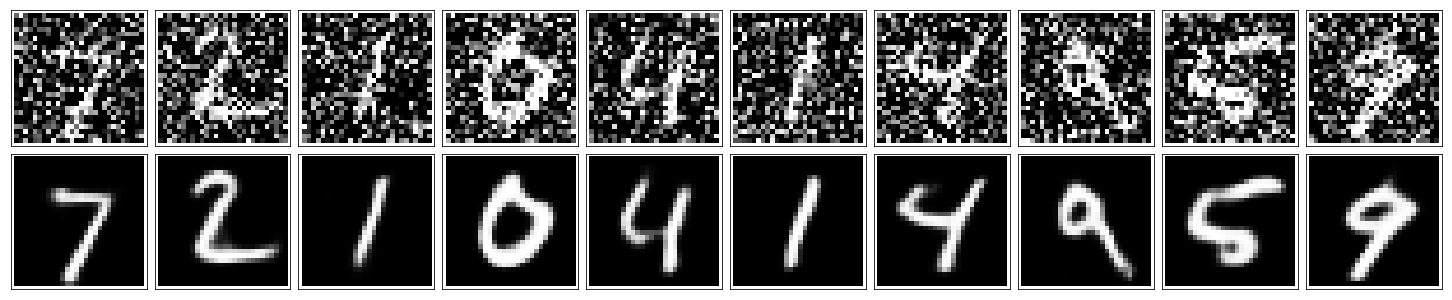

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)